# МАСТЕРСКАЯ


**Стоимость поддержанного автомобиля**

**Предскажи стоимость автомобиля на вторичном рынке.
В этом конкурсе ваша задача - разработать модель для предсказания стоимости продажи автомобиля на вторичном рынке.**

**ДАННЫЕ**

- train.csv - информация о характеристиках автомобилей (~440000), которые будут использоваться в качестве обучающих данных.
- test.csv - информация о характеристиках автомобилей (~110000), которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета.
- sample_submission.csv - пример файла предсказаний в правильном формате.

- vin - идентификатор автомобиля в тестовом наборе.
- sellingprice - Целевой признак. Для каждого автомобиля предскажите числовое значение стоимости продажи.

**ОПИСАНИЕ ПОЛЕЙ ДАННЫХ**

    Date: Год выпуска автомобиля.
    Make: Марка автомобиля.
    Model: издание автомобиля определенной марки.
    Trim: Уровни отделки салона автомобиля — это просто разные версии модели.
    Body: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
    Transmission: механизм, который передает мощность от двигателя к колесам.
    VIN: идентификационный номер транспортного средства.
    State: состояние, в котором автомобиль выставлен на аукцион.
    Condition: Состояние автомобилей на момент аукциона.
    Odometer: расстояние, пройденное автомобилем с момента выпуска.
    Color: Цвет кузова автомобиля.
    Interior: Цвет салона автомобиля.
    Seller: Продавец автомобиля, автосалоны.

**Шаг 1. Загружаем все необходимые библиотеки, открываем данные и поверхностно изучаем их**

In [1]:
# Загружаем трубуемые библиотеки для нашей работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from ydata_profiling import ProfileReport

pd.set_option('display.max_columns', None)

In [2]:
# Читаем файлы и записываем в переменные
data_train = pd.read_csv('/Users/tbetterknow/Desktop/Яндекс Практикум/Мастерская 1 USED CARS/used-cars-price-prediction-22ds/train.csv')
data_test = pd.read_csv('/Users/tbetterknow/Desktop/Яндекс Практикум/Мастерская 1 USED CARS/used-cars-price-prediction-22ds/test.csv')
data_example = pd.read_csv('/Users/tbetterknow/Desktop/Яндекс Практикум/Мастерская 1 USED CARS/used-cars-price-prediction-22ds/sample_submission.csv')

In [3]:
# Смотрим на размеры датасетов data_train и data_test
print(data_train.shape)
print(data_test.shape)

(440236, 15)
(110058, 14)


In [4]:
# Выводим первые строки датасета data_train
data_train.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [5]:
# Выводим первые строки датасета data_train
data_test.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [6]:
data_example.shape

(110058, 2)

In [7]:
data_example.head(5)

,vin,sellingprice
0,1g6dp567450124779,13592.209588
1,1gtw7fca7e1902207,13592.209588
2,jn8az1mw6dw303497,13592.209588
3,2g1wf5e34d1160703,13592.209588
4,1n6aa0ec3dn301209,13592.209588


In [8]:
# Смотрим на данные data_train методом info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [9]:
# Смотрим на данные data_test методом info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


In [10]:
# Смотрим на данные data_example методом info()
data_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           110058 non-null  object 
 1   sellingprice  110058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


По разельтатам первичного охнакомления с данными мы понимаем, что в нашем распоряжении следующие данные:
- data_train - информация о характеристиках автомобилей (~440000), которые будут использоваться в качестве обучающих данных.
- data_test - информация о характеристиках автомобилей (~110000), которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета.
- data_sample - пример файла предсказаний в правильном формате.

data_train содержит 440236 строк и 15 столбцов. Набор данных data_test содержит 110058 строк и 14 столбцов. Все дело в том, что в data_test отсутствует столбец sellingprice, который нам необходимо предскахать, обучив лучшую модель на обучающем наборе данных. Также, можно сделать вывод, что данные data_train и data_test являются одним набором данных, разбитым на обучающую и тестовую выборки в соотношении 80/20.

Изучив данные методом info() критических ошибок не замечено. 

Следующим шагом проверим данные на наличие пропусков, дубликатов и других неочевидных недочетов.

**Шаг 2. Изучаем данные на наличие пропусков и дубликатов**

In [11]:
# Создадим функцию для вывода обоих показателей
def nas_duplicates(data):
    print("Количество пропусков:         ", data.isna().sum().sum())
    print("Дубликаты:   ", data.duplicated().sum())

In [12]:
# Выводим значения пропусков и дубликатов в датасете data_train
nas_duplicates(data_train)

Количество пропусков:          97003
Дубликаты:    0


Результат показал наличие пропусков в обучающем наборе данных в количестве 97003. 
Требуется детально проработать пропуски. 
Посмотрим на распределнеие пропусков по столбцам.

In [13]:
data_train.isna().sum()

year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64

In [14]:
# Выводим значения пропусков и дубликатов в датасете data_test
nas_duplicates(data_test)

Количество пропусков:          24573
Дубликаты:    0


Результат показал наличие пропусков в тестовом наборе данных в количестве 24573. 
Требуется также детально проработать пропуски. 
Посмотрим на распределнеие пропусков по столбцам в тестовом датасете.

In [15]:
data_test.isna().sum()

year                0
make             2061
model            2079
trim             2114
body             2594
transmission    13011
vin                 0
state               0
condition        2379
odometer           19
color             158
interior          158
seller              0
saledate            0
dtype: int64

По результатам вывода пропусков с детализацией по столбцам можно видно, что раибольшее количество присутствует в столбце transmission, далее идет body, затем condition и trim, model, make, причем такая история одинакова для обоих датасетов.

Что касаетс дубликатов, то очевидных не обнаружено, следующим шагом проверим и обработаем неявные дубликаты, после чего обработаем пропуски.

**Шаг 3. Обрабатываем неявные дубликаты**

Будем поочередно обрабатывать слудующие столбцы:
- make / Марка автомобиля
- model / Издание автомобиля определенной марки
- trim / Уровни отделки салона автомобиля
- body / Тип кузова
- transmission / Коробка передач
- condition / Состояние автомобиля на момент аукциона
- odometer / Расстояние, пройденное автомобилем с момента выпуска
- color / Цвет кузова автомобиля
- interior / Цвет салона автомобиля

Важно заметить, что поскольку мы определили, что обучающий и тестовый датасеты являются частями одного набора данных, то при обработке пропусков и дубликатов мы будем фокусироваться на обучающий датасет, однако обработку пропусков и дубликатов будем делать как для обучающего, так и для тестового датасета, применив логику обработки обучающего датасета на тестовый.

In [16]:
# Начнем обработку неявных дубликатов с make
# Посмотрим на уникальные значения data_train
data_train['make'].unique()

array(['Ford', 'Nissan', 'HUMMER', 'Lincoln', 'pontiac', 'Hyundai', nan,
       'Buick', 'Chevrolet', 'Honda', 'Acura', 'Cadillac', 'GMC', 'Saab',
       'Dodge', 'Mercedes-Benz', 'Toyota', 'Volkswagen', 'BMW',
       'Infiniti', 'Chrysler', 'Kia', 'Jaguar', 'Subaru', 'Jeep', 'Lexus',
       'mercedes', 'Scion', 'FIAT', 'Suzuki', 'Mazda', 'Volvo', 'Audi',
       'MINI', 'Isuzu', 'Mitsubishi', 'smart', 'Pontiac', 'Porsche',
       'subaru', 'ford', 'Land Rover', 'chrysler', 'Saturn', 'mazda',
       'dodge', 'Ram', 'Oldsmobile', 'hyundai', 'Mercury', 'Bentley',
       'toyota', 'lincoln', 'Fisker', 'nissan', 'chevrolet', 'honda',
       'porsche', 'mitsubishi', 'lexus', 'bmw', 'Maserati', 'acura',
       'jeep', 'mercury', 'Tesla', 'landrover', 'vw', 'cadillac', 'buick',
       'gmc truck', 'land rover', 'volkswagen', 'Rolls-Royce', 'audi',
       'Ferrari', 'suzuki', 'Plymouth', 'oldsmobile', 'Lamborghini',
       'gmc', 'Geo', 'ford truck', 'Aston Martin', 'plymouth', 'Daewoo',
      

In [17]:
# Начнем обработку неявных дубликатов с make
# Посмотрим на уникальные значения data_test
data_test['make'].unique()

array(['Cadillac', 'GMC', 'Nissan', 'Chevrolet', 'Volkswagen', 'Hyundai',
       'Ford', 'Infiniti', 'Subaru', 'Kia', 'BMW', nan, 'Mitsubishi',
       'Dodge', 'Oldsmobile', 'Volvo', 'Pontiac', 'Acura', 'Honda',
       'Toyota', 'Audi', 'Jeep', 'Lincoln', 'Chrysler', 'Mercedes-Benz',
       'Ram', 'Scion', 'Mercury', 'Lexus', 'Saturn', 'Mazda', 'Porsche',
       'MINI', 'smart', 'Buick', 'HUMMER', 'ford', 'chrysler', 'Jaguar',
       'mitsubishi', 'FIAT', 'Saab', 'mazda', 'Suzuki', 'Land Rover',
       'bmw', 'cadillac', 'oldsmobile', 'honda', 'acura', 'buick',
       'landrover', 'Geo', 'lexus', 'dodge', 'chevrolet', 'chev truck',
       'nissan', 'Bentley', 'jeep', 'mercury', 'toyota', 'gmc', 'Isuzu',
       'Aston Martin', 'Maserati', 'land rover', 'kia', 'subaru',
       'Daewoo', 'vw', 'volkswagen', 'Tesla', 'mercedes', 'Ferrari',
       'hyundai', 'pontiac', 'Fisker', 'porsche', 'Rolls-Royce', 'Lotus',
       'Plymouth', 'hyundai tk', 'lincoln', 'ford tk', 'audi'],
      dtype=ob

Невооруженным глазом видно, что необходимо привести название марок авто к единому регистру, а именно к нижнему.

In [18]:
# Изменяем регистр на нижний в обучающем датасете
data_train['make'] = data_train['make'].str.lower()

In [19]:
# Изменяем регистр на нижний в тестовом датасете
data_test['make'] = data_test['make'].str.lower()

In [20]:
# Проверяем сделанные преобразования в обучающем датасете
data_train['make'].unique()

array(['ford', 'nissan', 'hummer', 'lincoln', 'pontiac', 'hyundai', nan,
       'buick', 'chevrolet', 'honda', 'acura', 'cadillac', 'gmc', 'saab',
       'dodge', 'mercedes-benz', 'toyota', 'volkswagen', 'bmw',
       'infiniti', 'chrysler', 'kia', 'jaguar', 'subaru', 'jeep', 'lexus',
       'mercedes', 'scion', 'fiat', 'suzuki', 'mazda', 'volvo', 'audi',
       'mini', 'isuzu', 'mitsubishi', 'smart', 'porsche', 'land rover',
       'saturn', 'ram', 'oldsmobile', 'mercury', 'bentley', 'fisker',
       'maserati', 'tesla', 'landrover', 'vw', 'gmc truck', 'rolls-royce',
       'ferrari', 'plymouth', 'lamborghini', 'geo', 'ford truck',
       'aston martin', 'daewoo', 'mercedes-b', 'dodge tk', 'mazda tk',
       'dot', 'airstream'], dtype=object)

In [21]:
# Проверяем сделанные преобразования в тестовом датасете
data_test['make'].unique()

array(['cadillac', 'gmc', 'nissan', 'chevrolet', 'volkswagen', 'hyundai',
       'ford', 'infiniti', 'subaru', 'kia', 'bmw', nan, 'mitsubishi',
       'dodge', 'oldsmobile', 'volvo', 'pontiac', 'acura', 'honda',
       'toyota', 'audi', 'jeep', 'lincoln', 'chrysler', 'mercedes-benz',
       'ram', 'scion', 'mercury', 'lexus', 'saturn', 'mazda', 'porsche',
       'mini', 'smart', 'buick', 'hummer', 'jaguar', 'fiat', 'saab',
       'suzuki', 'land rover', 'landrover', 'geo', 'chev truck',
       'bentley', 'isuzu', 'aston martin', 'maserati', 'daewoo', 'vw',
       'tesla', 'mercedes', 'ferrari', 'fisker', 'rolls-royce', 'lotus',
       'plymouth', 'hyundai tk', 'ford tk'], dtype=object)

Изменение на нижний регистр прошло успешно. Однако, заметно, что в списке названий авто присутствуют неявные дубликаты, а именно некоторые марки авто повторяются в разных вариантах, например 'ford', 'ford tk', 'hyundai', 'hyundai tk' и т.д. требуется обработать неявные дубликаты и привести их к единому названию.

Для удобства отфильтруем все названия авто, которые встречаются в обоих датасетах под разными обозначениями.

In [22]:
# Отфильтровываем и выводим списком названия авто обучающего датасета, чьи названия удалось найти как неявные дубликаты
print(data_train[data_train['make'].str.startswith('v', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('ford', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('mercedes', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('hyundai', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('dodge', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('mazda', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('chev', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('gmc', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('land', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('rolls', na=False)]['make'].unique())



['volkswagen' 'volvo' 'vw']
['ford' 'ford truck']
['mercedes-benz' 'mercedes' 'mercedes-b']
['hyundai']
['dodge' 'dodge tk']
['mazda' 'mazda tk']
['chevrolet']
['gmc' 'gmc truck']
['land rover' 'landrover']
['rolls-royce']


In [23]:
# Отфильтровываем и выводим списком названия авто тестового датасета, чьи названия удалось найти как неявные дубликаты
print(data_test[data_test['make'].str.startswith('v', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('ford', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('mercedes', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('hyundai', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('dodge', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('mazda', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('chev', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('gmc', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('land', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('rolls', na=False)]['make'].unique())

['volkswagen' 'volvo' 'vw']
['ford' 'ford tk']
['mercedes-benz' 'mercedes']
['hyundai' 'hyundai tk']
['dodge']
['mazda']
['chevrolet' 'chev truck']
['gmc']
['land rover' 'landrover']
['rolls-royce']


Следующим шагом приведем все неявные дубликаты к единому наименованию.

In [24]:
# Создаем словарь замен названий авто сразу для обоих датасетов
make_rename = {
    'vw' : 'volkswagen',
    'ford truck' : 'ford',
    'ford tk' : 'ford',
    'mercedes-b' : 'mercedes',
    'mercedes-benz' : 'mercedes',
    'hyundai tk' : 'hyundai',
    'dodge tk' : 'dodge',
    'mazda tk' : 'mazda',
    'chev truck' : 'chevrolet',
    'gmc truck' : 'gmc',
    'land rover' : 'landrover',
    'rolls-royce' : 'rollsroyce'
}

In [25]:
# Заменем неявные дубликаты в обучающем датасете
data_train['make'] = data_train['make'].replace(make_rename)

# Заменем неявные дубликаты в тестовом датасете
data_test['make'] = data_test['make'].replace(make_rename)

In [26]:
# Проверяем сделанные преобразования в обучающем датасете
print(data_train[data_train['make'].str.startswith('v', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('ford', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('mercedes', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('hyundai', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('dodge', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('mazda', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('chev', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('gmc', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('land', na=False)]['make'].unique())
print(data_train[data_train['make'].str.startswith('rolls', na=False)]['make'].unique())

['volkswagen' 'volvo']
['ford']
['mercedes']
['hyundai']
['dodge']
['mazda']
['chevrolet']
['gmc']
['landrover']
['rollsroyce']


In [27]:
# Проверяем сделанные преобразования в тестовом датасете
print(data_test[data_test['make'].str.startswith('v', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('ford', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('mercedes', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('hyundai', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('dodge', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('mazda', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('chev', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('gmc', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('land', na=False)]['make'].unique())
print(data_test[data_test['make'].str.startswith('rolls', na=False)]['make'].unique())

['volkswagen' 'volvo']
['ford']
['mercedes']
['hyundai']
['dodge']
['mazda']
['chevrolet']
['gmc']
['landrover']
['rollsroyce']


Мы успешно избавились от неявных дубликатов в столбце make. Следующий на очереди столбец model.

In [28]:
# Посмотрим на уникальные значения в обучающем датасете
data_train['model'].unique()

array(['Edge', 'Fusion', 'Sentra', 'H2', 'MKZ', 'g6', 'Escape', 'Elantra',
       'Freestyle', nan, 'Lucerne', 'Windstar', 'Silverado 1500',
       'Murano', 'Equinox', 'Accord', 'Civic', 'MDX', 'CTS', 'Taurus',
       'SRX', 'Yukon', '9-3', 'Explorer', 'F-150', 'Charger', 'Armada',
       'GL-Class', 'Avalon', 'Tahoe', 'Malibu', 'Passat', 'Camry', 'Flex',
       '3 Series', 'Q50', 'Altima', 'Mustang', '300', 'Sonata',
       'Envoy XL', 'Rogue', 'Accent', 'Maxima', 'Forte', 'XF', 'Outback',
       'Grand Caravan', 'E-Class', 'Cherokee', 'Impala', 'Optima',
       '5 Series', 'Expedition', 'IS 250', 'MKS', '200', 'Veloster',
       'Golf', 'RAV4', 'e300dt', 'Five Hundred', 'G Coupe',
       'Grand Cherokee', 'X-Type', 'G Convertible', 'Tacoma', 'xA',
       'G Sedan', 'TL', 'Liberty', 'Soul', '500L', 'Town and Country',
       'HHR', 'Wrangler', 'Reno', 'Suburban', 'PT Cruiser', 'GX 460',
       'Sienna', 'SL-Class', 'Envoy', 'Patriot', 'E-Series Van', 'Versa',
       'Aspen', 'M', 'Co

In [29]:
# Посмотрим на уникальные значения в тестовом датасете
data_test['model'].unique()

array(['CTS', 'Savana Cargo', 'Murano', 'Impala', 'Titan', 'Passat',
       'Sonata', 'Explorer', 'G Sedan', 'Suburban', 'Forester', 'Escape',
       'Fiesta', 'Taurus', 'Forte', '6 Series', 'TrailBlazer',
       'Silverado 1500', 'Genesis', 'Equinox', nan, 'Lancer',
       'E-Series Wagon', 'Grand Caravan', 'Focus', 'Alero', 'XC60',
       'Montana', 'Fusion', 'Soul', 'TSX', 'G6', 'Accord', 'Maxima',
       'Camry', 'Sierra 1500', 'A6', 'Camaro', 'RAV4', 'Corolla', 'XC70',
       'Compass', 'Expedition', 'Jetta', 'CR-V', 'LS', 'Odyssey',
       'Transit Connect', 'Optima', 'Traverse', 'F-150', 'Elantra',
       'Altima', 'S6', 'Sorento', 'G35', 'M', 'FJ Cruiser',
       'Town and Country', 'Civic', 'C-Class', 'Avenger', '1500', 'FR-S',
       'X3', '300', 'Magnum', 'F-350 Super Duty', 'STS', 'G Coupe',
       'Terrain', 'Spectra', 'Cruze', 'Journey', 'Tucson', 'Tundra',
       'Malibu', 'Grand Cherokee', 'Grand Marquis', 'Sedona', 'RX 350',
       'A4', 'LS 460', '3 Series', 'X5', 'Ya

Первым, что необходимо исправить - это привести все названия к единому нижнему регистру.

In [30]:
# Изменяем регистр на нижний в обучающем датасете
data_train['model'] = data_train['model'].str.lower()

# Изменяем регистр на нижний в тестовом датасете
data_test['model'] = data_test['model'].str.lower()

In [31]:
# Проверяем сделанные преобразования в обучабщем датасете
data_train['model'].unique()

array(['edge', 'fusion', 'sentra', 'h2', 'mkz', 'g6', 'escape', 'elantra',
       'freestyle', nan, 'lucerne', 'windstar', 'silverado 1500',
       'murano', 'equinox', 'accord', 'civic', 'mdx', 'cts', 'taurus',
       'srx', 'yukon', '9-3', 'explorer', 'f-150', 'charger', 'armada',
       'gl-class', 'avalon', 'tahoe', 'malibu', 'passat', 'camry', 'flex',
       '3 series', 'q50', 'altima', 'mustang', '300', 'sonata',
       'envoy xl', 'rogue', 'accent', 'maxima', 'forte', 'xf', 'outback',
       'grand caravan', 'e-class', 'cherokee', 'impala', 'optima',
       '5 series', 'expedition', 'is 250', 'mks', '200', 'veloster',
       'golf', 'rav4', 'e300dt', 'five hundred', 'g coupe',
       'grand cherokee', 'x-type', 'g convertible', 'tacoma', 'xa',
       'g sedan', 'tl', 'liberty', 'soul', '500l', 'town and country',
       'hhr', 'wrangler', 'reno', 'suburban', 'pt cruiser', 'gx 460',
       'sienna', 'sl-class', 'envoy', 'patriot', 'e-series van', 'versa',
       'aspen', 'm', 'co

In [32]:
# Проверяем сделанные преобразования в тестовом датасете
data_train['model'].unique()

array(['edge', 'fusion', 'sentra', 'h2', 'mkz', 'g6', 'escape', 'elantra',
       'freestyle', nan, 'lucerne', 'windstar', 'silverado 1500',
       'murano', 'equinox', 'accord', 'civic', 'mdx', 'cts', 'taurus',
       'srx', 'yukon', '9-3', 'explorer', 'f-150', 'charger', 'armada',
       'gl-class', 'avalon', 'tahoe', 'malibu', 'passat', 'camry', 'flex',
       '3 series', 'q50', 'altima', 'mustang', '300', 'sonata',
       'envoy xl', 'rogue', 'accent', 'maxima', 'forte', 'xf', 'outback',
       'grand caravan', 'e-class', 'cherokee', 'impala', 'optima',
       '5 series', 'expedition', 'is 250', 'mks', '200', 'veloster',
       'golf', 'rav4', 'e300dt', 'five hundred', 'g coupe',
       'grand cherokee', 'x-type', 'g convertible', 'tacoma', 'xa',
       'g sedan', 'tl', 'liberty', 'soul', '500l', 'town and country',
       'hhr', 'wrangler', 'reno', 'suburban', 'pt cruiser', 'gx 460',
       'sienna', 'sl-class', 'envoy', 'patriot', 'e-series van', 'versa',
       'aspen', 'm', 'co

Все преобразования выполнены, проверив все названия, неявных дубликатов не выявлено. Переходим к изучению столбца trim.

In [33]:
# Смотрим на уникальные значения в обучающем датасете
data_train['trim'].unique()

array(['SEL', 'SE', '2.0 SL', ..., '2.5 X L.L.Bean Edition',
       '3500 High Roof 140 WB', '4x4 v6 xlt sport'], dtype=object)

In [34]:
# Смотрим на уникальные значения в тестовом датасете
data_test['trim'].unique()

array(['Base', '2500', 'S', ..., 'Hybrid w/Technology Package',
       'V6 Luxury Sport', 'awd xs ll bean'], dtype=object)

Первым, что необходимо исправить - это привести все названия к единому нижнему регистру.

In [35]:
# Изменяем регистр на нижний в обучающем датасете
data_train['trim'] = data_train['trim'].str.lower()

# Изменяем регистр на нижний в тестовом датасете
data_test['trim'] = data_test['trim'].str.lower()

In [36]:
# Проверяем сделанные преобразования в обучающем датасете
data_train['trim'].unique()

array(['sel', 'se', '2.0 sl', ..., '2.5 x l.l.bean edition',
       '3500 high roof 140 wb', '4x4 v6 xlt sport'], dtype=object)

In [37]:
# Проверяем сделанные преобразования в тестовом датасете
data_test['trim'].unique()

array(['base', '2500', 's', ..., 'hybrid w/technology package',
       'v6 luxury sport', 'awd xs ll bean'], dtype=object)

In [38]:
# Посмотрим на распределение по отделке в обучающем датасете
data_train['trim'].value_counts()

base                43876
se                  34498
lx                  16511
limited             14516
lt                  13431
                    ...  
cl65 amg                1
cargo awd w/yf7         1
gr tr gr touring        1
sub 4x4 v8              1
4x4 v6 xlt sport        1
Name: trim, Length: 1850, dtype: int64

In [39]:
# Посмотрим на распределение по отделке в тестовом датасете
data_test['trim'].value_counts()

base                11009
se                   8725
lx                   4098
limited              3536
lt                   3280
                    ...  
4wd s                   1
hx                      1
gr tr gr touring        1
mr touring              1
awd xs ll bean          1
Name: trim, Length: 1457, dtype: int64

Определить, есть ли неявные дубликаты достаточно сложно из-за наличия огромного количества комплектаций. Однако видно, что львиная доля присуще комплектациям base, se, lx, limited. Обработку столбца trim оставляем в таком виде.

Следующим шагом переходим к обработке столбца body.

In [40]:
# Посмотрим на уникальные значения в обучающем датасете
data_train['body'].unique()

array(['suv', 'Sedan', 'sedan', nan, 'SUV', 'wagon', 'Minivan',
       'Extended Cab', 'Regular Cab', 'Coupe', 'SuperCrew', 'Wagon',
       'convertible', 'Crew Cab', 'SuperCab', 'Convertible', 'Hatchback',
       'minivan', 'hatchback', 'G Coupe', 'G Convertible', 'coupe',
       'Access Cab', 'G Sedan', 'regular cab', 'e-series van',
       'supercrew', 'Quad Cab', 'tsx sport wagon', 'Van', 'g sedan',
       'E-Series Van', 'CTS Coupe', 'Koup', 'King Cab', 'extended cab',
       'double cab', 'Elantra Coupe', 'koup', 'access cab', 'Double Cab',
       'crew cab', 'quad cab', 'g coupe', 'CrewMax Cab', 'supercab',
       'g convertible', 'Genesis Coupe', 'van', 'G37 Coupe', 'club cab',
       'Beetle Convertible', 'Mega Cab', 'regular-cab', 'Xtracab',
       'cts coupe', 'genesis coupe', 'Club Cab', 'q60 coupe', 'mega cab',
       'crewmax cab', 'Promaster Cargo Van', 'king cab', 'CTS-V Coupe',
       'TSX Sport Wagon', 'CTS Wagon', 'Cab Plus 4', 'G37 Convertible',
       'Transit Van'

In [41]:
# Посмотрим на уникальные значения в тестовом датасете
data_test['body'].unique()

array(['Sedan', 'Van', 'SUV', 'Crew Cab', 'wagon', 'G Sedan', 'Hatchback',
       'sedan', 'Convertible', 'crew cab', nan, 'van', 'Minivan', 'Wagon',
       'Coupe', 'suv', 'supercrew', 'minivan', 'SuperCrew', 'quad cab',
       'g coupe', 'CrewMax Cab', 'Regular Cab', 'G37 Coupe', 'hatchback',
       'Quad Cab', 'regular cab', 'coupe', 'E-Series Van', 'Extended Cab',
       'supercab', 'e-series van', 'Access Cab', 'G Coupe', 'convertible',
       'Double Cab', 'extended cab', 'SuperCab', 'king cab', 'g sedan',
       'CTS Coupe', 'genesis coupe', 'Beetle Convertible', 'access cab',
       'Promaster Cargo Van', 'crewmax cab', 'G Convertible', 'Mega Cab',
       'koup', 'Elantra Coupe', 'Koup', 'Q60 Convertible',
       'g convertible', 'Q60 Coupe', 'double cab', 'Club Cab', 'King Cab',
       'CTS-V Coupe', 'Xtracab', 'Genesis Coupe', 'tsx sport wagon',
       'club cab', 'mega cab', 'cts coupe', 'elantra coupe',
       'cts-v coupe', 'granturismo convertible', 'Cab Plus',
       'TS

По аналогии с предыдущими столбцами видно, что первым делом необходимо привести все названия к единому нижнему регистру.

In [42]:
# Изменяем регистр на нижний в обучающем датасете
data_train['body'] = data_train['body'].str.lower()

# Изменяем регистр на нижний в тестовом датасете
data_test['body'] = data_test['body'].str.lower()

In [43]:
# Проверяем сделанные преобразования в обучающем датасете
data_train['body'].unique()

array(['suv', 'sedan', nan, 'wagon', 'minivan', 'extended cab',
       'regular cab', 'coupe', 'supercrew', 'convertible', 'crew cab',
       'supercab', 'hatchback', 'g coupe', 'g convertible', 'access cab',
       'g sedan', 'e-series van', 'quad cab', 'tsx sport wagon', 'van',
       'cts coupe', 'koup', 'king cab', 'double cab', 'elantra coupe',
       'crewmax cab', 'genesis coupe', 'g37 coupe', 'club cab',
       'beetle convertible', 'mega cab', 'regular-cab', 'xtracab',
       'q60 coupe', 'promaster cargo van', 'cts-v coupe', 'cts wagon',
       'cab plus 4', 'g37 convertible', 'transit van', 'q60 convertible',
       'cab plus', 'ram van', 'granturismo convertible', 'cts-v wagon'],
      dtype=object)

In [44]:
# Проверяем сделанные преобразования в тестовом датасете
data_test['body'].unique()

array(['sedan', 'van', 'suv', 'crew cab', 'wagon', 'g sedan', 'hatchback',
       'convertible', nan, 'minivan', 'coupe', 'supercrew', 'quad cab',
       'g coupe', 'crewmax cab', 'regular cab', 'g37 coupe',
       'e-series van', 'extended cab', 'supercab', 'access cab',
       'double cab', 'king cab', 'cts coupe', 'genesis coupe',
       'beetle convertible', 'promaster cargo van', 'g convertible',
       'mega cab', 'koup', 'elantra coupe', 'q60 convertible',
       'q60 coupe', 'club cab', 'cts-v coupe', 'xtracab',
       'tsx sport wagon', 'granturismo convertible', 'cab plus',
       'g37 convertible', 'regular-cab', 'transit van', 'cts wagon'],
      dtype=object)

In [45]:
# Посмотрим на распределение уникальных значений
data_train['body'].value_counts()

sedan                      190861
suv                        113042
hatchback                   20715
minivan                     20114
coupe                       13896
crew cab                    12823
wagon                       12600
convertible                  8183
supercrew                    7081
g sedan                      5859
supercab                     4143
regular cab                  3861
van                          3544
extended cab                 3500
quad cab                     3208
e-series van                 1426
g coupe                      1282
double cab                   1260
crewmax cab                   429
king cab                      418
g convertible                 251
access cab                    232
genesis coupe                 221
club cab                      141
koup                          135
cts coupe                     115
mega cab                       94
elantra coupe                  74
beetle convertible             52
promaster carg

Можно заметить, что данные содержат неявные дубликаты, которые можно, и более того, необходимо привести к единому наименованию, напрмер crew cab, regular cab, double cab можно привести к единому cab и т.д.

Проверив данные, мы выбрали следующие категории:

- sedan
- coupe
- cab
- convertible
- wagon
- van

Следующим шагои сделаем замену неявных дубликатов на указданные категории

In [46]:
# Сформируем словарь для замены неявных дубликатов
body_rename = {
    'crew cab': 'cab',
    'g sedan': 'sedan',
    'supercab': 'cab',
    'regular cab': 'cab',
    'extended cab': 'cab',
    'quad cab': 'cab',
    'e-series van': 'van',
    'g coupe': 'coupe',
    'double cab': 'cab',
    'crewmax cab': 'cab',
    'king cab': 'cab',
    'g convertible': 'convertible',
    'access cab': 'cab',
    'genesis coupe': 'coupe',
    'club cab': 'cab',
    'koup': 'coupe',
    'cts coupe': 'coupe',
    'mega cab': 'cab',
    'elantra coupe': 'coupe',
    'beetle convertible': 'convertible',
    'promaster cargo van': 'van',
    'q60 convertible': 'convertible',
    'xtracab': 'cab',
    'q60 coupe': 'coupe',
    'tsx sport wagon': 'wagon',
    'cts-v coupe': 'coupe',
    'g37 convertible': 'convertible',
    'transit van': 'van',
    'regular-cab': 'cab',
    'g37 coupe': 'coupe',
    'granturismo convertible': 'convertible',
    'cts wagon': 'wagon',
    'cab plus 4': 'cab',
    'cab plus': 'cab',
    'ram van': 'van',
    'cts-v wagon': 'wagon'    
}

In [47]:
# Следующим шагом примени сформированный словарь и заменим все неявные дубликаты к обучающему датасету
data_train['body'] = data_train['body'].replace(body_rename)

# Заменим все неявные дубликаты в тестовом датасете
data_test['body'] = data_test['body'].replace(body_rename)


In [48]:
# Проверим следанные преобразования методом value_counts() в обучающем датасете
data_train['body'].value_counts()

sedan          196720
suv            113042
cab             30162
hatchback       20715
minivan         20114
coupe           15791
wagon           12639
convertible      8547
supercrew        7081
van              5032
Name: body, dtype: int64

In [49]:
# Проверим следанные преобразования методом value_counts() в тестовом датасете
data_test['body'].value_counts()

sedan          48970
suv            28295
cab             7471
hatchback       5152
minivan         5091
coupe           3995
wagon           3287
convertible     2149
supercrew       1731
van             1323
Name: body, dtype: int64

Обработка неявных дубликатов в столбце body выполнена успешно.

Следубщим шагом посмотрим глубже на столбец transmission и в случае необходимости обработаем неявные дубликаты.

In [50]:
# Посмотрим на уникальные значения в обучающем датасете
data_train['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

In [51]:
# Посмотрим на уникальные значения в тестовом датасете
data_test['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

Неявных дубликатов в столбце transmission не выявлено, имеются только значения automatic, manual и nan.
Пропуски обработаем позже.

Посмотрим на столбцы condition и odometer.

In [52]:
# Посмотрим на уникальные значения в обучающем датасете
data_train['condition'].unique()

array([4.2, 3.5, 2.2, 2.8, 2. , 2.5, 3.4, 4.8, 1.9, 1. , 3.1, 2.7, 3.6,
       2.9, 4.1, 2.6, 2.1, 3. , 4.9, 4.7, 4. , 3.3, 3.8, 3.7, 4.5, 4.6,
       5. , 4.3, 2.4, 2.3, 3.9, nan, 3.2, 4.4, 1.4, 1.5, 1.7, 1.2, 1.3,
       1.6, 1.8, 1.1])

In [53]:
# Посмотрим на уникальные значения в обучающем датасете
data_train['odometer'].unique()

array([111041.,  31034.,  35619., ..., 188944.,  87635., 174269.])

Столбцы condition и odometer обрабатывать на наличие дубликатов нет смысла, так как это данные типа float.

Переходим к следующему столбцу color, проверим на наличие неявных дубликатов.


In [54]:
# Посмотрим на уникальные значения в обучающем датасете
data_train['color'].unique()

array(['black', 'gold', 'silver', 'blue', 'white', 'gray', '—', 'red',
       'brown', 'green', 'beige', 'orange', nan, 'off-white', 'burgundy',
       'yellow', 'charcoal', 'purple', 'turquoise', 'lime', 'pink'],
      dtype=object)

In [55]:
# Посмотрим на уникальные значения в тестовом датасете
data_test['color'].unique()

array(['silver', 'white', 'gray', 'black', 'blue', 'red', 'burgundy',
       'off-white', 'gold', 'green', 'orange', 'charcoal', 'brown', '—',
       'beige', 'yellow', 'purple', nan, 'turquoise', 'pink', 'lime'],
      dtype=object)

Неявных дубликатов в столбце color не выявлено. Обнаружены пропуски nan, а также символ '—', обработаем их позже.

Следующим шагом посмотри глубже на столбец interior.

In [56]:
# Посмотрим на уникальные значения в обучающем датасете
data_train['interior'].unique()

array(['black', 'beige', 'gray', 'tan', 'brown', '—', 'off-white', nan,
       'blue', 'white', 'silver', 'red', 'green', 'gold', 'purple',
       'orange', 'burgundy', 'yellow'], dtype=object)

In [57]:
# Посмотрим на уникальные значения в тестовом датасете
data_test['interior'].unique()

array(['black', 'gray', 'beige', 'tan', '—', 'brown', 'red', 'silver',
       nan, 'blue', 'purple', 'off-white', 'green', 'orange', 'gold',
       'burgundy', 'white', 'yellow'], dtype=object)

Также как и в столбце color неявных дубликатов в столбце interior не выявлено. Обнаружены пропуски nan, а также символ '—', обработаем их позже. 

Теперь переходим к обработке пропусков.

**Шаг 4. Обрабатываем пропуски**

Обрабатывать пропуски будем в той же последовательности:

- make / Марка автомобиля
- model / Издание автомобиля определенной марки
- trim / Уровни отделки салона автомобиля
- body / Тип кузова
- transmission / Коробка передач
- condition / Состояние автомобиля на момент аукциона
- odometer / Расстояние, пройденное автомобилем с момента выпуска
- color / Цвет кузова автомобиля
- interior / Цвет салона автомобиля

Начнем по порядку со столбца make. Все пропуски заполним как unknown, поскольку нет данных по которым можно было бы понять какая марка авто должна стоять вместо пропуска.

In [58]:
# заполняем пропуски в столбце make в обоих датасетах на значение unknown
data_train['make'].fillna('unknown', inplace=True)
data_test['make'].fillna('unknown', inplace=True)


В следующем столбце model пропуски также заполним на unknown, поскольку нет данных по которым можно было бы понять какая модель авто должна стоять вместо пропуска.

In [59]:
# заполняем пропуски в столбце model в обоих датасетах на значение unknown
data_train['model'].fillna('unknown', inplace=True)
data_test['model'].fillna('unknown', inplace=True)

В следующем столбце trim пропуски также заполним на unknown. Причина та же - отсутствие данных по которым можно было бы понять какая отделка авто должна стоять вместо пропуска.

In [60]:
# заполняем пропуски в столбце trim в обоих датасетах на значение unknown
data_train['trim'].fillna('unknown', inplace=True)
data_test['trim'].fillna('unknown', inplace=True)

Переходим к обработке пропусков столбца body / тип кузова.

Тип кузова автомобиля может быть частично восстановлен на основе модели автомобиля. Мы выберем те модели, для которых в данных есть только один тип кузова (исключая значения NaN).


In [61]:
# Отфильтровываем данные и исключаем строки с пропусками с столбце body
data = data_train.dropna(subset=['body'])

# Создаем словарь для сопоставления модели и типа кузова
model_body = {}
for model in data['model'].unique():
    filter_body_types = data[(data['model'] == model)]['body'].unique()
    if (len(filter_body_types) == 1) and (model != 'unknown'):
        model_body[model] = filter_body_types[0]

In [62]:
# Проверяем как сработало сопоставление модели и типа кузова
model_body

{'edge': 'suv',
 'fusion': 'sedan',
 'sentra': 'sedan',
 'h2': 'suv',
 'mkz': 'sedan',
 'escape': 'suv',
 'freestyle': 'wagon',
 'lucerne': 'sedan',
 'windstar': 'minivan',
 'silverado 1500': 'cab',
 'murano': 'suv',
 'equinox': 'suv',
 'mdx': 'suv',
 'cts': 'sedan',
 'srx': 'suv',
 'yukon': 'suv',
 'explorer': 'suv',
 'charger': 'sedan',
 'armada': 'suv',
 'gl-class': 'suv',
 'avalon': 'sedan',
 'tahoe': 'suv',
 'malibu': 'sedan',
 'flex': 'wagon',
 'q50': 'sedan',
 '300': 'sedan',
 'sonata': 'sedan',
 'envoy xl': 'suv',
 'rogue': 'suv',
 'maxima': 'sedan',
 'xf': 'sedan',
 'grand caravan': 'minivan',
 'cherokee': 'suv',
 'impala': 'sedan',
 'optima': 'sedan',
 'expedition': 'suv',
 'is 250': 'sedan',
 'mks': 'sedan',
 'veloster': 'hatchback',
 'golf': 'hatchback',
 'rav4': 'suv',
 'five hundred': 'sedan',
 'g coupe': 'coupe',
 'grand cherokee': 'suv',
 'g convertible': 'convertible',
 'tacoma': 'cab',
 'xa': 'hatchback',
 'g sedan': 'sedan',
 'tl': 'sedan',
 'liberty': 'suv',
 'soul'

In [63]:
# Заполняем пропуски в тах строках в data_train, где срабатывает сопоставление модели и типа кузова
for model in model_body.keys():
    data_train.loc[(data_train['model'] == model) & (data_train['body'].isna()), 'body'] = model_body[model]

In [64]:
# Заполняем пропуски в тах строках в data_test, где срабатывает сопоставление модели и типа кузова
for model in model_body.keys():
    data_test.loc[(data_test['model'] == model) & (data_test['body'].isna()), 'body'] = model_body[model]

In [65]:
# Оставшиеся незаполненные пропуски заполняем как unknown
data_train['body'].fillna('unknown', inplace=True)
data_test['body'].fillna('unknown', inplace=True)

Следующим шагом переходим к обработке пропусков в столбце transmission. По подобию обработки пропусков в столбце body, пропуски в transmission можно частично заполнить на основании данных столбца model, сопоставив значения строк модели авто и коробки передач. Но важно учитывать, что некоторые модели авто имеют как ручную, так и автоматическую коробку передач. Поэтому, при заполнении пропусков мы будем опираться на модели, для которых записи содержат только один тип коробки передач.

In [66]:
# Обрабатываем пропуски для обучающего датасета
# Определяем модели у которых в записи присутствует только один тип коробки передач
# мы используем функцию nunique() для подсчета количества уникальных типов трансмиссии для каждой модели
list_of_models_train = data_train.groupby('model')['transmission'].nunique()
list_of_models_train = list_of_models_train[list_of_models_train == 1].index

# Заполняем пропуски для тех моделей, которые были сопоставлены с моделью авто только с одной коробкой передачи
data_train.loc[data_train['model'].isin(list_of_models_train) & data_train['transmission'].isna(), 'transmission'] = data_train.loc[data_train['model'].isin(list_of_models_train) & data_train['transmission'].isna(), 'model'].map(data_train.groupby('model')['transmission'].first())

# Заполняем оставшиеся пропуски занчением unknown
data_train['transmission'].fillna('unknown', inplace=True)

In [67]:
# Обрабатываем пропуски для тестового датасета
# Определяем модели у которых в записи присутствует только один тип коробки передач
# мы используем функцию nunique() для подсчета количества уникальных типов трансмиссии для каждой модели
list_of_models_test = data_test.groupby('model')['transmission'].nunique()
list_of_models_test = list_of_models_test[list_of_models_test == 1].index

# Заполняем пропуски для тех моделей, которые были сопоставлены с моделью авто только с одной коробкой передачи
data_test.loc[data_test['model'].isin(list_of_models_test) & data_test['transmission'].isna(), 'transmission'] = data_test.loc[data_test['model'].isin(list_of_models_test) & data_test['transmission'].isna(), 'model'].map(data_test.groupby('model')['transmission'].first())

# Заполняем оставшиеся пропуски занчением unknown
data_test['transmission'].fillna('unknown', inplace=True)


Следующим шагом обработаем пропуски в столбце condition. Пропуски в данном столбце принимаем решение заполнить медианным значением, сопоставив и расчитав медианное значения в соответствии с годом по столбцу year. Заполнять пропуски будем через группировку данных и расчета медианного значения condition по каждому году столбца year.

In [68]:
# Заполняем пропуски в обучающем датасете
data_train['condition'] = data_train.groupby('year')['condition'].transform(lambda x: x.fillna(x.median()))

# Заполняем пропуски в тестовом датасете
data_test['condition'] = data_test.groupby('year')['condition'].transform(lambda x: x.fillna(x.median()))

Следующим шагом обработаем пропуски в столбце odometer. По аналогии с заполнением пропусков в столбце condition, заполним пропуски в odometer медианным значением, сопоставив и расчитав медианное значения в соответствии с годом по столбцу year методом группировки.

In [69]:
# Заполняем пропуски в обучающем датасете
data_train['odometer'] = data_train.groupby('year')['odometer'].transform(lambda x: x.fillna(x.median()))

# Заполняем пропуски в тестовом датасете
data_test['odometer'] = data_test.groupby('year')['odometer'].transform(lambda x: x.fillna(x.median()))

Переходим к обработке прорусков в столбце color. Все пропуски заполним значением unknown, поскольку у нет данных по которым можно было бы понять какой цвет авто должн стоять вместо пропуска.

In [70]:
# Заполняем пропуски в тренировочном датасете
data_train['color'].fillna('unknown', inplace=True)

# Заполняем пропуски в тестовом датасете
data_test['color'].fillna('unknown', inplace=True)

При обработке неявных дубликатов мы также определили, что в данным столбце присутствует значение '-', что скорее всего подразумевает пропуск. Принимаем решение также заполнить данные значения как unknown.

In [71]:
# Заполняем пропуски в тренировочном датасете
data_train['color'].replace('—', 'unknown', inplace=True)

# Заполняем пропуски в тестовом датасете
data_test['color'].replace('—', 'unknown', inplace=True)

In [72]:
# Проверяем сделанные преобразования
data_train['color'].unique()

array(['black', 'gold', 'silver', 'blue', 'white', 'gray', 'unknown',
       'red', 'brown', 'green', 'beige', 'orange', 'off-white',
       'burgundy', 'yellow', 'charcoal', 'purple', 'turquoise', 'lime',
       'pink'], dtype=object)

In [73]:
# Проверяем сделанные преобразования
data_test['color'].unique()

array(['silver', 'white', 'gray', 'black', 'blue', 'red', 'burgundy',
       'off-white', 'gold', 'green', 'orange', 'charcoal', 'brown',
       'unknown', 'beige', 'yellow', 'purple', 'turquoise', 'pink',
       'lime'], dtype=object)

Следубщим шагом обрабатываем пропуски в столбце interior, который означает цвет салона авто. Все пропуски также решено заполнить значением unknown.

In [74]:
# Заполняем пропуски в тренировочном датасете
data_train['interior'].fillna('unknown', inplace=True)

# Заполняем пропуски в тестовом датасете
data_test['interior'].fillna('unknown', inplace=True)

По аналогии со столбцом color, во время обработки неявных дубликатов мы обнаружили среди уникальных значений символ '-', который также принимаем за пропуск и заполняем значением unknown.

In [75]:
# Заполняем пропуски в тренировочном датасете
data_train['interior'].replace('—', 'unknown', inplace=True)

# Заполняем пропуски в тестовом датасете
data_test['interior'].replace('—', 'unknown', inplace=True)

In [76]:
# Проверяем сделанные преобразования
data_train['interior'].unique()

array(['black', 'beige', 'gray', 'tan', 'brown', 'unknown', 'off-white',
       'blue', 'white', 'silver', 'red', 'green', 'gold', 'purple',
       'orange', 'burgundy', 'yellow'], dtype=object)

In [77]:
# Проверяем сделанные преобразования
data_test['interior'].unique()

array(['black', 'gray', 'beige', 'tan', 'unknown', 'brown', 'red',
       'silver', 'blue', 'purple', 'off-white', 'green', 'orange', 'gold',
       'burgundy', 'white', 'yellow'], dtype=object)

In [78]:
# Проверяем сделанные преобразования
print(data_train.isna().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
dtype: int64


In [79]:
# Проверяем сделанные преобразования
print(data_test.isna().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
saledate        0
dtype: int64


Следующим шагом посмотрим детальнее на остальные столбцы на предмет дубликатов, а именно:
- year
- vin
- state
- seller
- sellingprice
- saledate

In [80]:
# Смотрим уникальные значения столбца year
data_train['year'].unique()

array([2011, 2014, 2012, 2003, 2007, 2013, 2010, 2000, 2005, 2006, 2004,
       2008, 2009, 2015, 2002, 2001, 1999, 1998, 1996, 1997, 1994, 1995,
       1993, 1989, 1991, 1988, 1987, 1990, 1992, 1985, 1986, 1983, 1984,
       1982])

In [81]:
# Смотрим уникальные значения столбца vin
data_train['vin'].unique()

array(['2fmdk3jc4bba41556', '3fa6p0h75er208976', '3n1ab6ap4cl698412', ...,
       'wbaea53588cv90110', '3c6ur5dl2eg243568', 'jn8as5mt9dw038107'],
      dtype=object)

In [82]:
# Смотрим уникальные значения столбца state
data_train['state'].unique()

array(['md', 'mo', 'nj', 'tx', 'mi', 'nc', 'fl', 'oh', 'ca', 'az', 'ga',
       'tn', 'in', 'pa', 'va', 'wi', 'co', 'ny', 'il', 'nv', 'mn', 'wa',
       'sc', 'la', 'ne', 'ok', 'or', 'on', 'ma', 'ab', 'pr', 'hi', 'ut',
       'qc', 'ms', 'nm', 'ns', 'al'], dtype=object)

In [83]:
# Смотрим уникальные значения столбца seller
data_train['seller'].unique()

array(['santander consumer', 'ars/avis budget group',
       'nissan-infiniti lt', ..., 'autostar enterprises',
       'kocourek nissan', 'studio city auto group'], dtype=object)

In [84]:
# Смотрим уникальные значения столбца sellingprice
data_train['sellingprice'].unique()

array([12500, 14500,  9100, ..., 67801,  1775,  2725])

In [85]:
# Смотрим уникальные значения столбца saledate
data_train['saledate'].unique()

array(['Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)',
       'Wed Feb 25 2015 02:00:00 GMT-0800 (PST)',
       'Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)', ...,
       'Wed Jan 07 2015 02:15:00 GMT-0800 (PST)',
       'Mon Dec 22 2014 08:30:00 GMT-0800 (PST)',
       'Wed May 20 2015 01:30:00 GMT-0700 (PDT)'], dtype=object)

В оставшихся столбцах неявных дубликатов нет, в столбце year они отсутствуют, в столбце vin и seller дубликаты могут встречаться, но из-за того, что авто могло продаваться несколько раз, а также продавец может повторяться, в столбце sellingprice стоимость может повторяться, опять же, в столбце saledate одна дата продажи может встречаться несколько раз.

Мы загрузили данные, изучили их поверхностно, были обнаружены неявные дубликаты и пропуски. На этапе обработки были удалены неявные дубликаты и заполнены пропуски в данных благодаря доступной информации.

В частности, для заполнения пропусков в столбцах transmission и body были использованы и сопоставлены данные в столбце model. Благодаря этому мы смогли определить и частично заполнить пропуски, указав вместо них нужные значения.

Пропуски в столбце odometer и condition было принято заполнить медианными значениеми, сопоставив данные их столбца year.

Следующим шагом переходим к более глубокому изучению данных, то есть к исследовательскому анализу данных (EDA).

**Шаг 5. Проводим исследовательский анализ данных (EDA)**

Начнем с изучения данных путем вывода графиков (гистограмм) по каждому столбцу, а также будем выявлять возможные закономерности и аномалии.

Будем изучать данные в следующем порядке:
- year            
- make            
- model           
- trim            
- body            
- transmission    
- vin             
- state           
- condition       
- odometer        
- color           
- interior        
- seller
- sellingprice
- saledate    

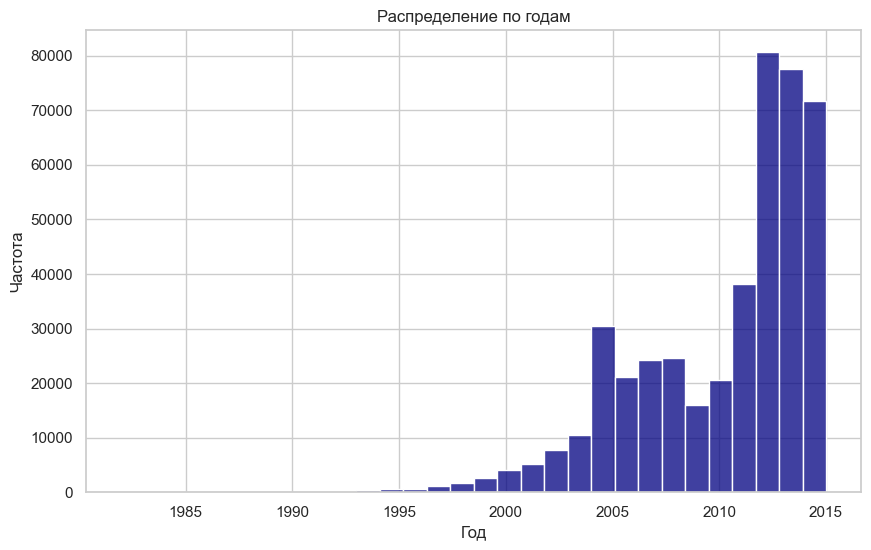

In [86]:
# Выводим гистограмму по столбцу year в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(10, 6))

# Создаем гистограмму
sns.histplot(data_train['year'], bins=30, color='navy')

# Задаем название по оси X и Y
plt.xlabel('Год')
plt.ylabel('Частота')
plt.title('Распределение по годам')

# Выводим гистограмму
plt.show()

Из полученной гистограммы видно, что львиная доля автомобилей была выпущена после 2010 года.

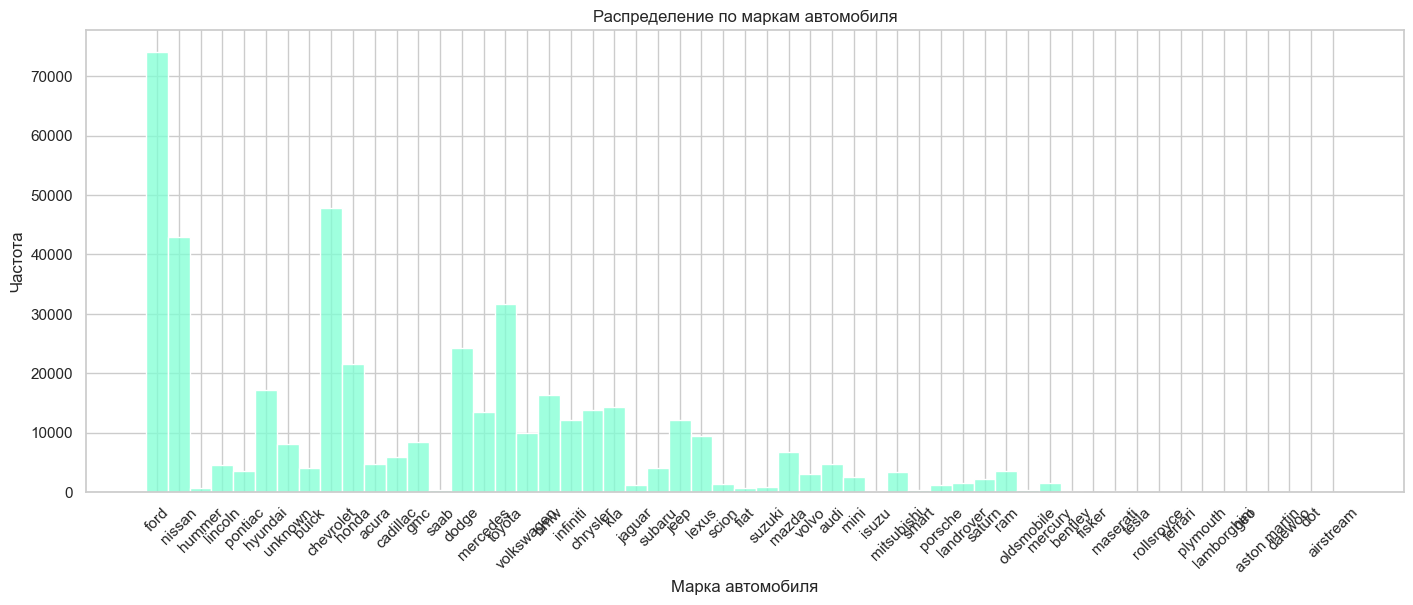

In [87]:
# Выводим гистограмму по столбцу make в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(17, 6))

# Создаем гистограмму
sns.histplot(data_train['make'], bins=30, color='Aquamarine')

# Задаем название по оси X и Y
plt.xlabel('Марка автомобиля')
plt.ylabel('Частота')
plt.title('Распределение по маркам автомобиля')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

In [88]:
# Смотрим на количество уникальных значений
data_train['make'].nunique()

55

В наших данных присутствует информация об 55 производителях (уникальных значений в столбце make). По частоте встречаемости в данных лидируют авто производства марки Ford, далее идут Chevrolet, Nissan, Toyota и Dodge.

In [89]:
# Посмотрим на количество моделей авто, встречаемых в данных
data_train['model'].nunique()

840

In [90]:
 # Также посмотрим на первую десятку
data_train['model'].value_counts().head(10)

altima      15454
f-150       11408
fusion      10244
camry       10000
escape       9447
focus        8222
unknown      8123
accord       7226
3 series     6406
impala       6305
Name: model, dtype: int64

In [91]:
# Посмотрим какой марке принадлежит 1ое место, а именно модель altima
data_train[data_train['model'] == 'altima'].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
52,2013,nissan,altima,2.5,sedan,automatic,1n4al3apxdc169056,fl,4.8,29418.0,brown,beige,nissan-infiniti lt,13800,Wed May 06 2015 02:00:00 GMT-0700 (PDT)
61,2012,nissan,altima,2.5 s,coupe,automatic,1n4al2epxcc113881,fl,3.9,35008.0,blue,black,nissan-infiniti lt,14000,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
79,2012,nissan,altima,2.5 s,sedan,automatic,1n4al2apxcn495906,tx,3.3,79377.0,gray,gray,gm financial,8000,Wed Jan 28 2015 02:00:00 GMT-0800 (PST)
116,2012,nissan,altima,2.5 s,sedan,automatic,1n4al2ap2cc151675,fl,1.9,21587.0,gray,black,nissan-infiniti lt,12400,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
142,2013,nissan,altima,2.5,sedan,automatic,1n4al3ap6dc200061,fl,2.0,32737.0,silver,unknown,enterprise vehicle exchange / tra / rental / t...,11000,Tue Mar 10 2015 02:00:00 GMT-0700 (PDT)


In [92]:
# Посмотрим какой марке принадлежит 2ое место, а именно модель f-150
data_train[data_train['model'] == 'f-150'].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
26,2012,ford,f-150,xlt,supercrew,automatic,1ftfw1cfxcfc23663,tx,2.9,98995.0,white,gray,"enterprise fleet management exchange, inc.",14000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
32,2013,ford,f-150,xlt,supercrew,automatic,1ftfw1ct8dkd06233,tx,3.8,25630.0,blue,gray,primeritus remarketing/mag interests,24400,Wed Jan 14 2015 02:00:00 GMT-0800 (PST)
51,2014,ford,f-150,xlt,cab,automatic,1ftfx1ef2eke24350,ny,4.9,15442.0,red,gray,ars/enterprise,26700,Wed Jan 21 2015 01:20:00 GMT-0800 (PST)
91,2004,ford,f-150,xlt,cab,unknown,1ftpx12584nb89868,ca,1.0,108069.0,black,gray,"jpmorgan chase bank,n.a.",2800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
119,2013,ford,f-150,xl,cab,automatic,1ftmf1cm2dkd84474,mo,2.8,58850.0,white,gray,automotive solutions llc,13200,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


В наших данных встречаются 840 разных моделей, первое место по частоте занимает модель altima от Nissan, на втором месте модель f-150 марки Ford.

In [93]:
# Посмотрим на количество уникальных значений столбца trim
data_train['trim'].nunique()

1851

In [94]:
 # Также посмотрим на первую десятку
data_train['trim'].value_counts().head(10)

base       43876
se         34498
lx         16511
limited    14516
lt         13431
xlt        13173
ls         10723
le         10231
gls         9707
s           9649
Name: trim, dtype: int64

In [95]:
# Посмотрим какой марке принадлежит 1ое место отделки авто, а именно base
data_train[data_train['trim'] == 'base'].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
5,2013,lincoln,mkz,base,sedan,automatic,3ln6l2j91dr817800,mi,2.5,14894.0,black,black,"ford motor credit company,llc",22600,Thu May 21 2015 02:00:00 GMT-0700 (PDT)
12,2003,ford,windstar,base,minivan,automatic,2fmza50453bb39611,az,1.9,145355.0,white,gray,cash time title loans,500,Tue Jan 06 2015 03:00:00 GMT-0800 (PST)
17,2004,chevrolet,silverado 1500,base,cab,automatic,1gcec14x14z341869,fl,2.9,196350.0,white,black,autonation chevrolet south clearwater,2300,Tue Jan 13 2015 10:00:00 GMT-0800 (PST)
19,2008,acura,mdx,base,suv,automatic,2hnyd28478h504752,tn,2.6,108473.0,white,beige,wells fargo dealer services,14000,Wed May 27 2015 03:30:00 GMT-0700 (PDT)


In [96]:
# Посмотрим какой марке принадлежит 2ое место отделки авто, а именно se
data_train[data_train['trim'] == 'se'].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
7,2013,ford,escape,se,suv,automatic,1fmcu0gx3duc59421,fl,4.8,26273.0,blue,gray,fields bmw,15200,Tue Feb 03 2015 01:00:00 GMT-0800 (PST)
16,2012,honda,accord,se,sedan,automatic,1hgcp2f61ca052981,ga,3.6,35905.0,white,beige,"ahfc/honda lease trust/hvt, inc. eot",13200,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
58,2009,hyundai,accent,se,hatchback,automatic,kmhcn36c99u114405,nj,2.4,62728.0,green,black,santander consumer,4000,Wed Feb 11 2015 01:30:00 GMT-0800 (PST)
71,2013,ford,fusion,se,sedan,automatic,3fa6p0h7xdr195494,nc,4.1,85641.0,blue,beige,ge fleet services for itself/servicer,11100,Tue Feb 03 2015 01:15:00 GMT-0800 (PST)


В наших данных встречается 1851 уникальное значение отделки салона авто. На первом месте по встречаемости занимет отделка base, на втором отделка с аббревиатурой se. Важно заметить, что данные обозначения встречабтся в большинстве марок авто, поэтому можно заключить, что это общее обозначение отделки по рынку. 

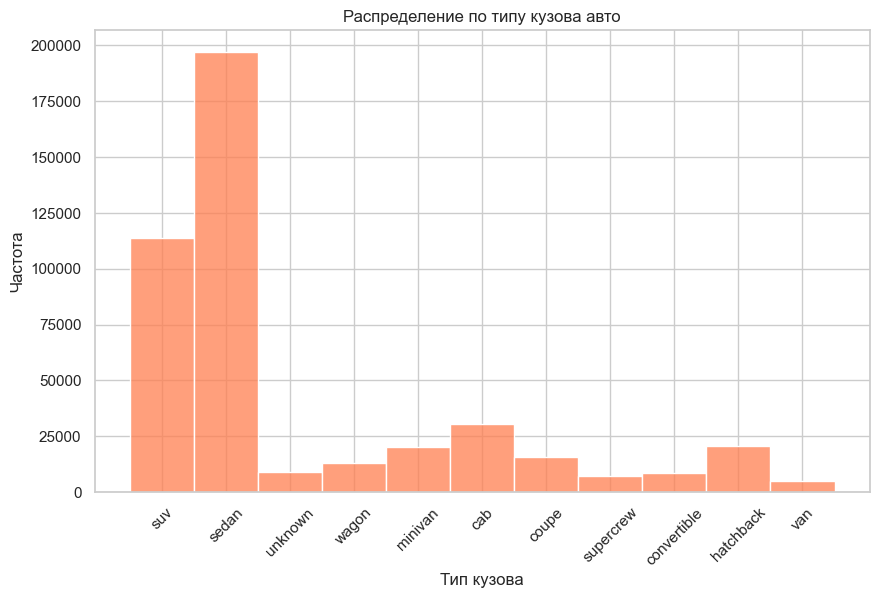

In [97]:
# Выводим гистограмму по столбцу body в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(10, 6))

# Создаем гистограмму
sns.histplot(data_train['body'], bins=30, color='coral')

# Задаем название по оси X и Y
plt.xlabel('Тип кузова')
plt.ylabel('Частота')
plt.title('Распределение по типу кузова авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

Обработав пропуски и неявные дубликаты, мы получили 11 уникальных значений в столбце body.
Из полученной гистограммы видно, что больше всего в данных представлены авто с кузовом sedan, далее идет кузов suv и cab.

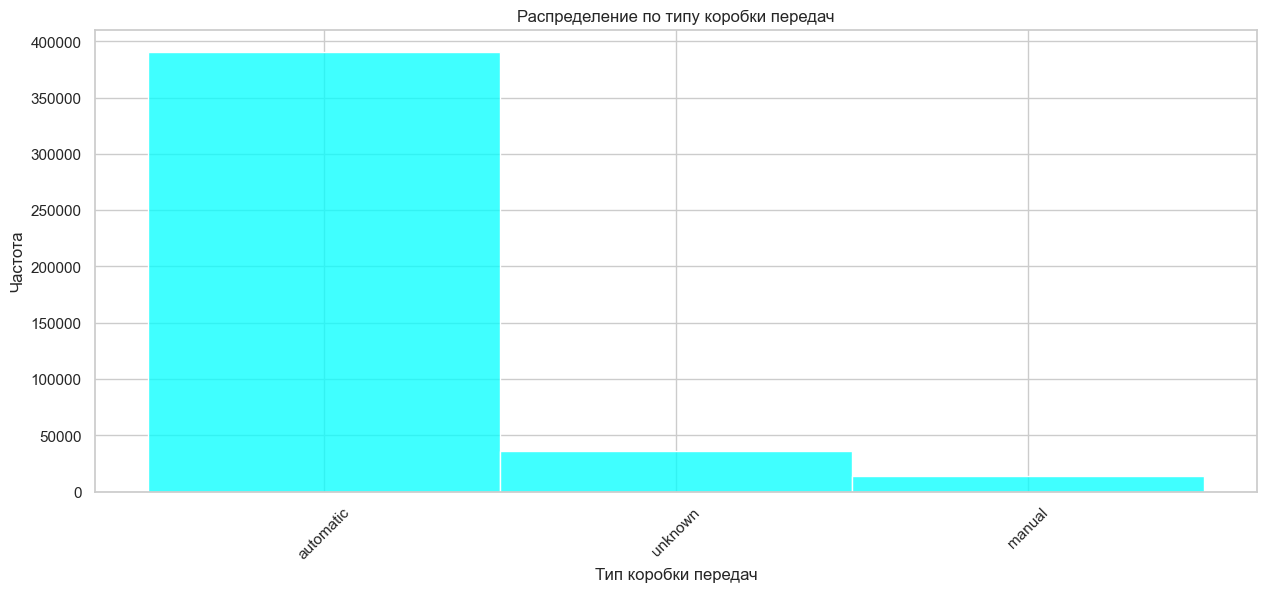

In [98]:
# Выводим гистограмму по столбцу transmission в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(15, 6))

# Создаем гистограмму
sns.histplot(data_train['transmission'], bins=30, color='cyan')

# Задаем название по оси X и Y
plt.xlabel('Тип коробки передач')
plt.ylabel('Частота')
plt.title('Распределение по типу коробки передач')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

В столбце transmission у нас львиная доля авто имеет автоматическую коробку передач, далее чаще всего встречается значение unknow, и замыкает ручная коробка передач.

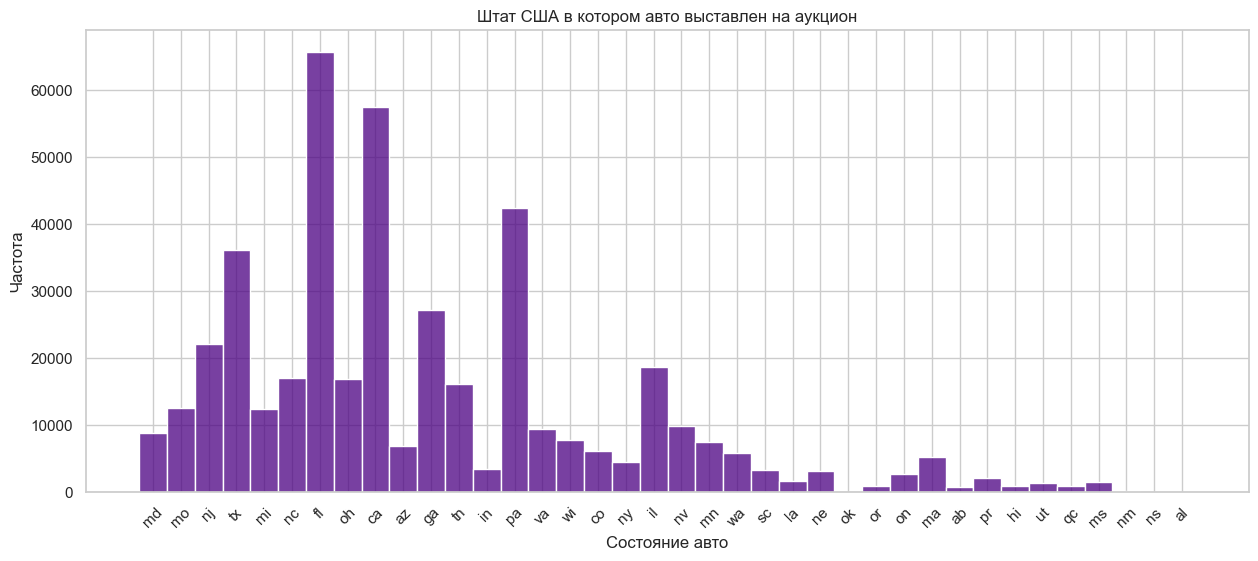

In [99]:
# Выводим гистограмму по столбцу state в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(15, 6))

# Создаем гистограмму
sns.histplot(data_train['state'], bins=30, color='indigo')

# Задаем название по оси X и Y
plt.xlabel('Состояние авто')
plt.ylabel('Частота')
plt.title('Штат США в котором авто выставлен на аукцион')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

(Предполагаю, что данные указанные в столбце state являются аббревиатурами штата, где авто было выставлено на продажу, а не состояние авто на момент выставления на аукцион. Использовать будем данный ресурс для определения штата: https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html)

В данных state больше всего авто выставлялось из штата fl (Florida), ca (California), pa (Pennsylvania), tx (Texas), ga (Georgia).

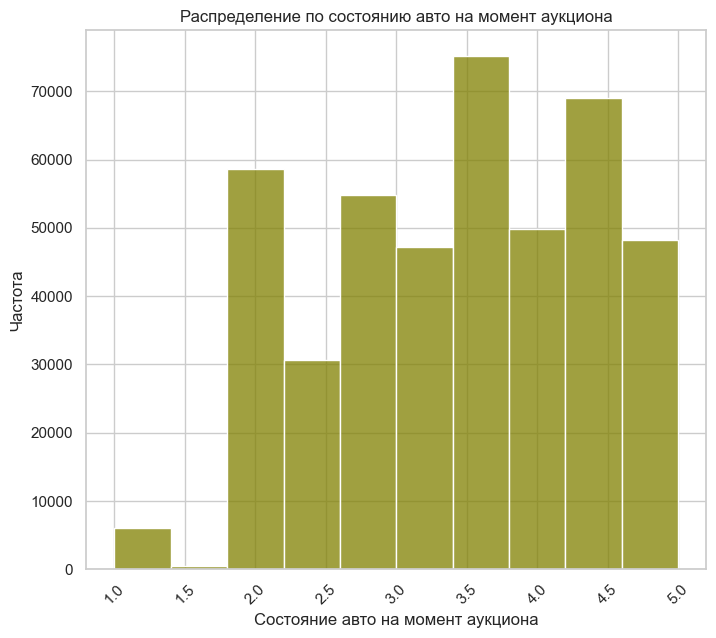

In [100]:
# Выводим гистограмму по столбцу condition в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(8, 7))

# Создаем гистограмму
sns.histplot(data_train['condition'], bins=10, color='olive')

# Задаем название по оси X и Y
plt.xlabel('Состояние авто на момент аукциона')
plt.ylabel('Частота')
plt.title('Распределение по состоянию авто на момент аукциона')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

Как мы видим из числа уникальных значений, состояние авто оценивается по пятибалльной шкале.

Большая часть авто в наших данных принадлежит к состоянию, оцененному в диапазоне от 2 до 4,5.

In [101]:
# Посчитаем долю состояния авто от 2 до 4,5
filtered_data_len = len(data_train[(data_train['condition'] <= 4.5) & (data_train['condition'] >= 2.0)])
total_data_len = len(data_train)

filtered_data_len / total_data_len * 100


79.95484240271126

80% от всех данных занимают авто с состоянием от 2 до 4,5.

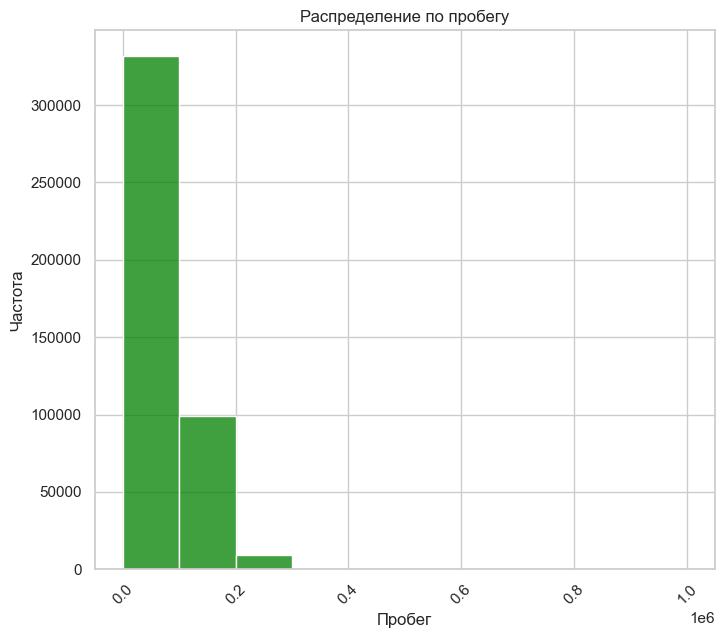

In [102]:
# Выводим гистограмму по столбцу odometer в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(8, 7))

# Создаем гистограмму
sns.histplot(data_train['odometer'], bins=10, color='green')

# Задаем название по оси X и Y
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.title('Распределение по пробегу')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

В основном в данных представлены авто с пробегом до 200 тыс. км (миль?). Однако, львиная доля из доли до 200 тыс. принадлежит авто с пробегом до 100 тыс.

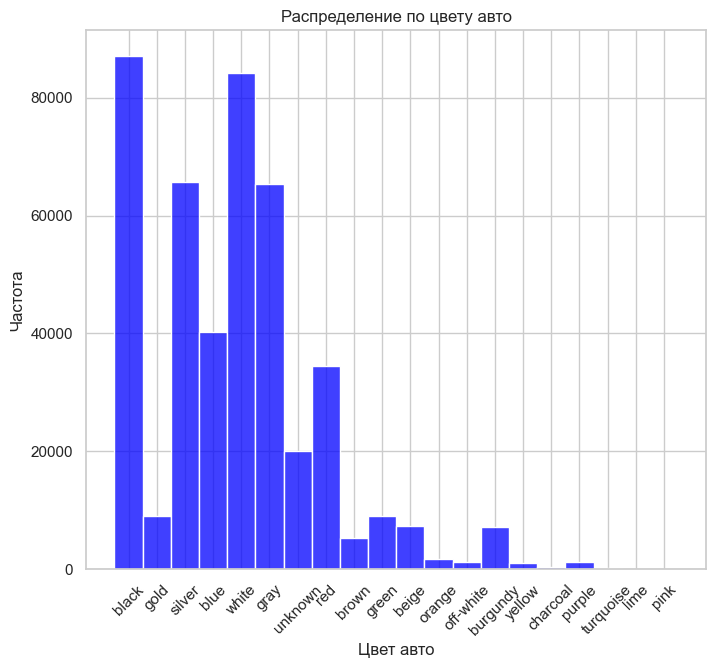

In [103]:
# Выводим гистограмму по столбцу color в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(8, 7))

# Создаем гистограмму
sns.histplot(data_train['color'], bins=10, color='blue')

# Задаем название по оси X и Y
plt.xlabel('Цвет авто')
plt.ylabel('Частота')
plt.title('Распределение по цвету авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

In [104]:
# Смотрим на количество уникальных значений
data_train['color'].nunique()

20

В наших данных авто распределяются по цветовым характеристикам на 20 уникальных значений. Исходя из полученной гистограммы мы видим, что больше всего представлено авто в черном, белом, серебристом и сером цветах, далее идет синий цвет.

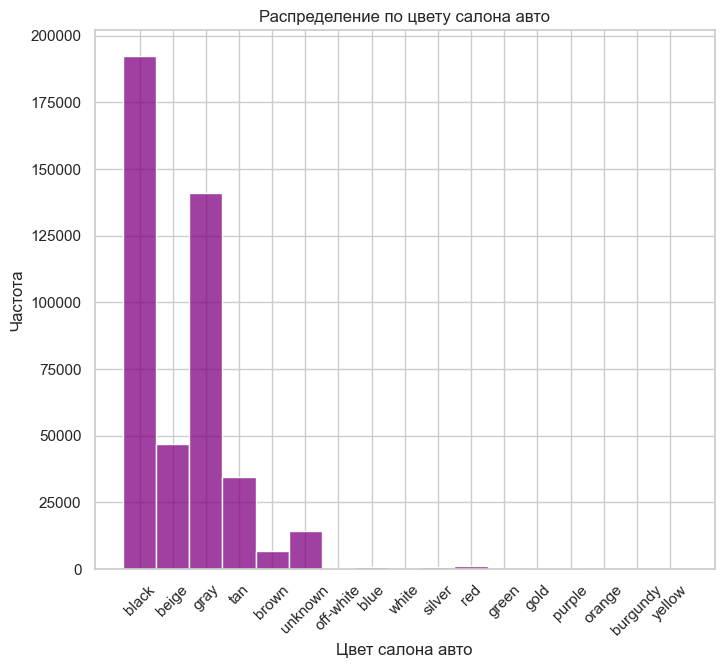

In [105]:
# Выводим гистограмму по столбцу interior в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(8, 7))

# Создаем гистограмму
sns.histplot(data_train['interior'], bins=10, color='purple')

# Задаем название по оси X и Y
plt.xlabel('Цвет салона авто')
plt.ylabel('Частота')
plt.title('Распределение по цвету салона авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

In [106]:
# Смотрим на количество уникальных значений
data_train['interior'].nunique()

17

Касательно цвета салона авто, в наших данных представлены авто с 16 цветовыми вариантами. Больше всего представлено авто с черным цветом салона, далее идет серый цвет, за ним бежевый.

In [107]:
# Смотрим на количество уникальных значений в столбце seller
data_train['seller'].nunique()

13025

Мы имеем больше 13к продавцов.

In [108]:
# Посмотрим на первых 20 продавцов по количеству продаж
data_train['seller'].value_counts().head(20)

nissan-infiniti lt                        15823
ford motor credit company,llc             15276
the hertz corporation                     14692
santander consumer                        12230
avis corporation                          10098
nissan infiniti lt                         7964
wells fargo dealer services                7061
enterprise veh exchange/rental             5516
tdaf remarketing                           5404
ge fleet services for itself/servicer      5368
hyundai motor finance                      5292
jpmorgan chase bank,n.a.                   4989
ahfc/honda lease trust/hvt, inc. eot       4854
financial services remarketing (lease)     4734
mercedes-benz financial services           4490
chrysler capital                           4478
gm financial                               4242
r hollenshead auto sales inc               3933
credit acceptance corp/vrs/southfield      3779
dt credit corporation                      3764
Name: seller, dtype: int64

На первом месте nissan-infiniti lt с почти 16к продаж, далее идут ford motor credit company,llc и the hertz corporation с 15к и 14к продажами, соответственно.


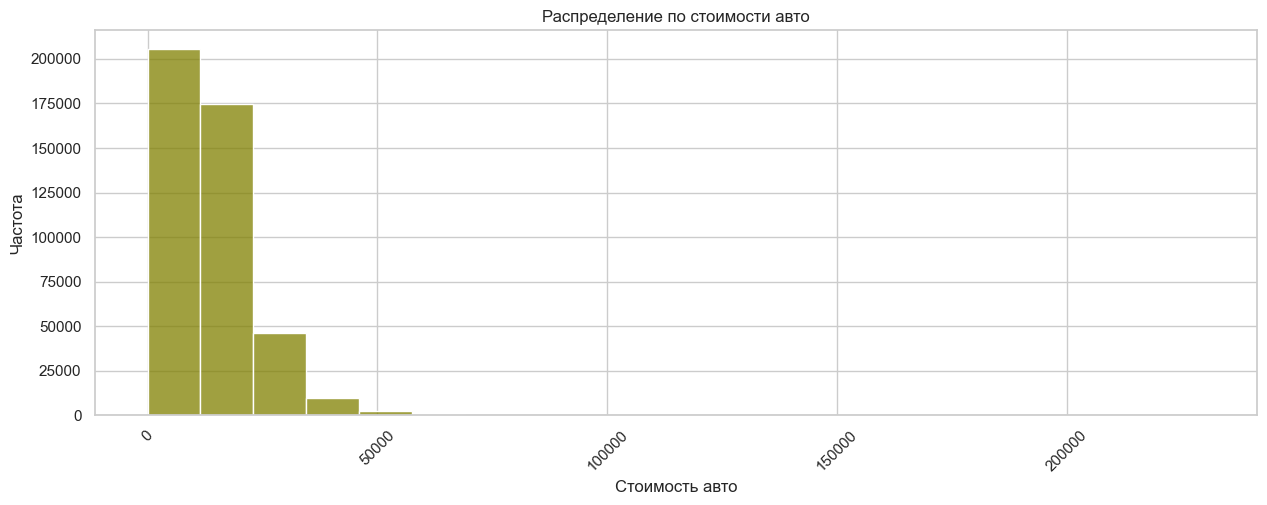

In [109]:
# Выводим гистограмму по столбцу sellingprice в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(15, 5))

# Создаем гистограмму
sns.histplot(data_train['sellingprice'], bins=20, color='olive')

# Задаем название по оси X и Y
plt.xlabel('Стоимость авто')
plt.ylabel('Частота')
plt.title('Распределение по стоимости авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

Исходя из результатов полученной гистограммы, можно сделать вывод, что практически все авто были проданы по цене меньше $50к.

**Вывод по разделу исследовательского анализа (EDA)**

Мы детальнее ознакомились со следующими столбцами и данными в них:

- year
- make
- model
- trim
- body
- transmission
- vin
- state
- condition
- odometer
- color
- interior
- seller
- sellingprice
- saledate

**Столбец year**

Мы выяснили, что львиная доля автомобилей была выпущена после 2010 года.

**Столбец make**

Мы определили, что в наших данных присутствует информация об 55 производителях (уникальных значений в столбце make). По частоте встречаемости в данных лидируют авто производства марки Ford, далее идут Chevrolet, Nissan, Toyota и Dodge.

**Столбец model**

В наших данных встречаются 840 разных моделей, первое место по частоте занимает модель altima от Nissan, на втором месте модель f-150 марки Ford.

**Столбец trim**

В наших данных встречается 1851 уникальное значение отделки салона авто. На первом месте по встречаемости занимет отделка base, на втором отделка с аббревиатурой se. Данные обозначения - это общее обозначение отделки по рынку, поэтому они встречаются у большинства марок авто.

**Столбец body**

В данных имеется 11 уникальных значений в столбце body. Больше всего представлены авто с кузовом sedan, далее идет кузов suv и cab.

**Столбец transmission**

В наших данных больге всего авто имебт автоматическую коробку передач, далее чаще всего встречается значение unknow, и замыкает ручная коробка передач.

**Столбец state**

Мы заключили, что данные указанные в столбце state являются аббревиатурами штата, где авто было выставлено на продажу, а не состояние авто на момент выставления на аукцион. Для определения штата, мы мспользовали следующий ресурс: https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html)

В данных state больше всего авто выставлялось из штата fl (Florida), ca (California), pa (Pennsylvania), tx (Texas), ga (Georgia).

**Столбец condition**

Состояние авто оценивается по пятибалльной шкале.
80% от всех данных представляют авто с состоянием от 2 до 4,5.

**Столбец odometer**

В наших данных представлены авто с пробегом до 200 тыс. км (миль?). Из авто, представленных в выборке до 200 тыс. км(миль) больше всего представлено авто с пробегом до 100 тыс.

**Столбец color**

В наших данных авто распределяются по цветовым характеристикам на 20 уникальных значений. Мы выяснили, что больше всего представлено авто в черном, белом, серебристом и сером цветах, далее идет синий цвет.

**Столбец interior**

Касательно цвета салона авто, в наших данных представлены авто с 16 цветовыми вариантами. Больше всего представлено авто с черным цветом салона, далее идет серый цвет, за ним бежевый.

**Столбец seller**

В наших данных прдставлено больше 13к продавцов. На первом месте по продажам представлен nissan-infiniti lt с почти 16к продаж, далее идут ford motor credit company,llc и the hertz corporation с 15к и 14к продажами, соответственно.

**Столбец sellingprice**

Изучив данные, мы определили, что практически все авто были проданы по цене меньше $50к.

**Столбец saledate**
Данный столбец будет обработан следующих шагом, поскольку будет также являться частью этапа формирования новых признаков.
По результатам создания новых признаков, мы дополнительно проанализируем их.

Переходим к этапу формирования новых признаков (feature engineering), а также обработки выбросов в данных.


**Шаг 6. Обработка выбросов (шумов) в данных и формирование новых признаков (feature engineering)**

Проверять будем числовые признаки обучающего датасета, такие как condition, odometer и sellingprice.

Что касается формирования новых признаков, то начнем со столбца saledate, который содержит такие данные как год продажи, месяц продажи и день недели. Соответственно, данные признаки мы сможем извлеч для детального анализа.


In [110]:
# Первым делом смотрим на количество уникальных значений в столбце saledate
data_train['saledate'].nunique()

3597

Что касается столбца saledate, то мы имеем 3,5к уникальных значений. Чтобы найти какие-либо закономерности, нам необходимо из данных этого столбца создать дополнительные признаки, такие как день продажи, неделя продажи, месяц продажи и год продажи. После этого мы сможем посмотреть более детально на закономерности и возможные аномалии.

In [111]:
# Смотрим на формат даты продажи авто
data_train['saledate']

0         Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1         Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2         Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3         Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4         Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
                           ...                   
440231    Tue Jan 20 2015 04:30:00 GMT-0800 (PST)
440232    Wed Feb 11 2015 02:00:00 GMT-0800 (PST)
440233    Tue Mar 03 2015 04:30:00 GMT-0800 (PST)
440234    Wed Jan 14 2015 02:05:00 GMT-0800 (PST)
440235    Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
Name: saledate, Length: 440236, dtype: object

Нам потребуется преобразовать данные с помощью функции pd.to_datetime, однако лишние значения (02:30:00 GMT-0700 (PDT)) это сделать не позволят. Для этого потребуется обрезать данные. Посчитав количество символов в данных в столбце saledate, принято решение обрезать данные по 15 символ включительно, чтобы в данных остались только день недели, месяц и год.

In [112]:
#Обрезаем данные в столбце saledate по 15 символ включительно
data_train['saledate'] = data_train['saledate'].str[:15]

In [113]:
# Проверяем формат даты продажи авто
data_train['saledate']

0         Tue Jun 02 2015
1         Wed Feb 25 2015
2         Wed Jun 10 2015
3         Wed Jun 17 2015
4         Tue Feb 03 2015
               ...       
440231    Tue Jan 20 2015
440232    Wed Feb 11 2015
440233    Tue Mar 03 2015
440234    Wed Jan 14 2015
440235    Thu Jan 15 2015
Name: saledate, Length: 440236, dtype: object

In [114]:
# Далее преобразовываем тип столбца saledate
data_train['rev_saledate'] = pd.to_datetime(
    data_train['saledate'],
    format='%a %b %d %Y'
)

In [115]:
# Проверяем формат даты продажи авто в обучающем датасете
data_train['rev_saledate']

0        2015-06-02
1        2015-02-25
2        2015-06-10
3        2015-06-17
4        2015-02-03
            ...    
440231   2015-01-20
440232   2015-02-11
440233   2015-03-03
440234   2015-01-14
440235   2015-01-15
Name: rev_saledate, Length: 440236, dtype: datetime64[ns]

In [116]:
# Также обрезаем и преобразовываем данные в тестовом датасете
data_test['saledate'] = data_test['saledate'].str[:15]

data_test['rev_saledate'] = pd.to_datetime(
    data_test['saledate'],
    format='%a %b %d %Y'
)

In [117]:
# Проверяем формат даты продажи авто в тестовом датасете
data_test['rev_saledate']

0        2015-01-14
1        2015-02-27
2        2015-02-24
3        2015-03-06
4        2015-06-03
            ...    
110053   2015-01-15
110054   2015-06-15
110055   2015-02-05
110056   2015-06-17
110057   2015-01-09
Name: rev_saledate, Length: 110058, dtype: datetime64[ns]

Теперь у нас есть возможность содать новые столбцы из данных, представленных в столбце rev_saledate. Создавать будем столбцы показывающие год, месяц, день недели продажи авто. После посмотрим на данным вновь созданных столбцов с помощью гистограммы.

In [118]:
# Создаем новый столбец year_sale, который показывает год продажи авто в обучающем датасете
data_train['year_sale'] = pd.DatetimeIndex(data_train['rev_saledate']).year

# Создаем новый столюец year_sale, который показывает год продажи авто в тестовом датасете
data_test['year_sale'] = pd.DatetimeIndex(data_test['rev_saledate']).year

In [119]:
# Создаем новый столбец month_sale, который показывает год продажи авто в обучабщем датасете
data_train['month_sale'] = pd.DatetimeIndex(data_train['rev_saledate']).month

# Создаем новый столюец month_sale, который показывает год продажи авто в тестовом датасете
data_test['month_sale'] = pd.DatetimeIndex(data_test['rev_saledate']).month

In [120]:
# Создаем новый столбец weekday_sale, который показывает год продажи авто в обучающем датасете
data_train['weekday_sale'] = pd.DatetimeIndex(data_train['rev_saledate']).weekday

# Создаем новый столюец weekday_sale, который показывает год продажи авто в тестовом датасете
data_test['weekday_sale'] = pd.DatetimeIndex(data_test['rev_saledate']).weekday

In [121]:
# Проверяем преобразования в обучающем датасете
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,rev_saledate,year_sale,month_sale,weekday_sale
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015,2015-06-02,2015,6,1
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015,2015-02-25,2015,2,2
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015,2015-06-10,2015,6,2
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015,2015-06-17,2015,6,2
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015,2015-02-03,2015,2,1


In [122]:
# Проверяем преобразования в тестовом датасете
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,rev_saledate,year_sale,month_sale,weekday_sale
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015,2015-01-14,2015,1,2
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015,2015-02-27,2015,2,4
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015,2015-02-24,2015,2,1
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015,2015-03-06,2015,3,4
4,2013,nissan,titan,sv,cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015,2015-06-03,2015,6,2


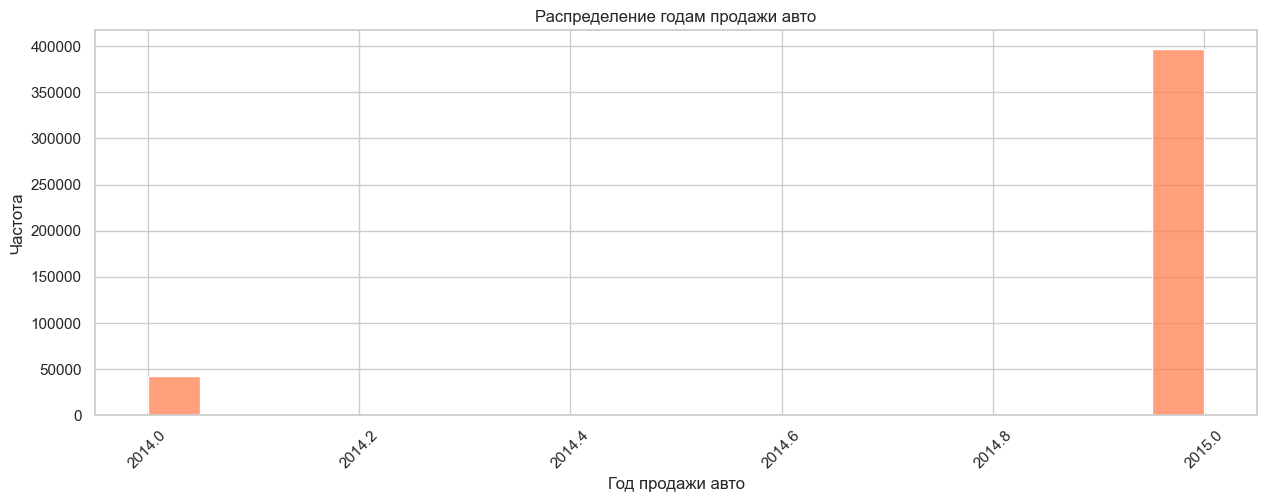

In [123]:
# Выводим гистограмму по столбцу year_sale в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(15, 5))

# Создаем гистограмму
sns.histplot(data_train['year_sale'], bins=20, color='coral')

# Задаем название по оси X и Y
plt.xlabel('Год продажи авто')
plt.ylabel('Частота')
plt.title('Распределение годам продажи авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

По результатам полученной гистограммы видно, что изучяемые данные прдеставляют из себя записи о продажах авто за неполный 2014 и 2015 года.

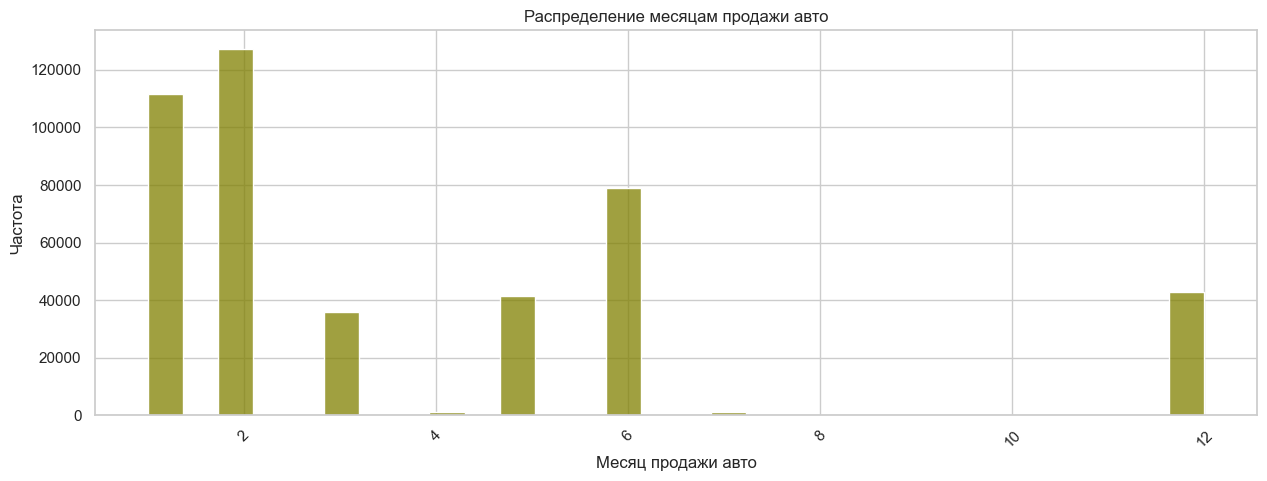

In [124]:
# Выводим гистограмму по столбцу month_sale в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(15, 5))

# Создаем гистограмму
sns.histplot(data_train['month_sale'], bins=30, color='olive')

# Задаем название по оси X и Y
plt.xlabel('Месяц продажи авто')
plt.ylabel('Частота')
plt.title('Распределение месяцам продажи авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

По результатам полученной гистограммы распрделения продаж по месяцам, видно, что больше всего авто продано в Феврале (2), Январе (1) и Июне (6). Каждый месяц обозначается как указано ниже:

- January: 1
- February: 2
- March: 3
- April: 4
- May: 5
- June: 6
- July: 7
- August: 8
- September: 9
- October: 10
- November: 11
- December: 12

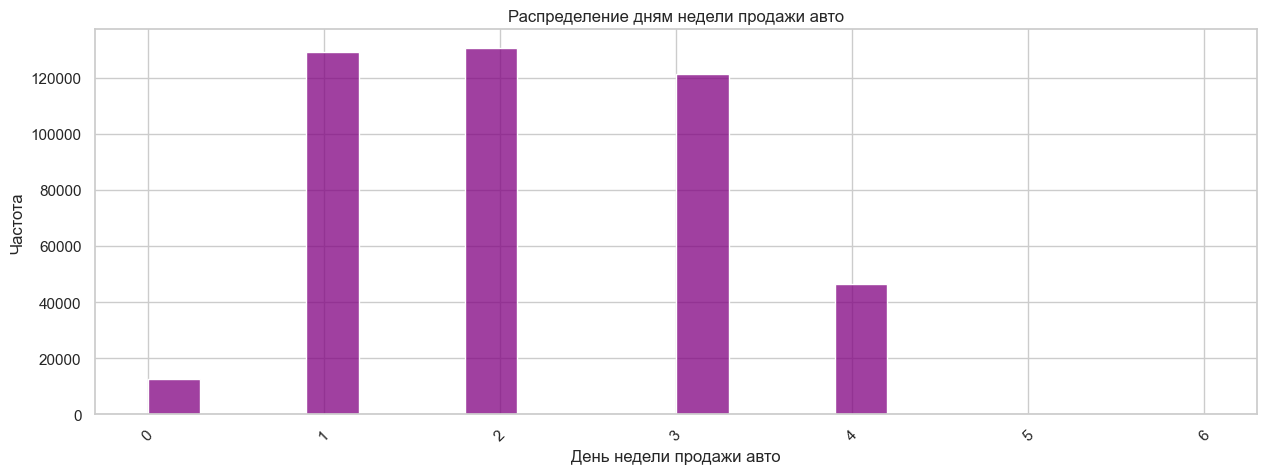

In [125]:
# Выводим гистограмму по столбцу weekday_sale в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(15, 5))

# Создаем гистограмму
sns.histplot(data_train['weekday_sale'], bins=20, color='purple')

# Задаем название по оси X и Y
plt.xlabel('День недели продажи авто')
plt.ylabel('Частота')
plt.title('Распределение дням недели продажи авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

По результатам изучения продаж с разбивкой по дням недели, мы видим что первые два места по частоте делят между собой Вторник (1) и Среда (2), далее идет Четверг (3).

Каждый день недели обозначается как указано ниже:
- Monday: 0
- Tuesday: 1
- Wednesday: 2
- Thursday: 3
- Friday: 4
- Saturday: 5
- Sunday: 6

1. Благодаря данным, извлеченным из столбца rev_saledate, а именно год продажи year_sale, мы можем создать новый столбец с количеством лет авто на момент продажи;
2. Также, мы сможем посчитать и добавить новые столбцы с медианной стоимостью по году производства, по производителю, по модели авто, по отделке авто, по каждому штату, и продавцу;
3. С помощью данных, представленных в столюце vin у нас есть возможность определить регион производства, что позволит на создать дополнительный признак;

In [126]:
# Создаем новый столбец с количеством лет авто от даты производства до даты продажи в обучающем датасете
data_train['num_years'] = data_train['year_sale'] - data_train['year']

# Создаем новый столбец с количеством лет авто от даты производства до даты продажи в тестовом датасете
data_test['num_years'] = data_test['year_sale'] - data_test['year']

In [127]:
# Проверим на количество пропусков
print(data_train['num_years'].isna().sum())
print(data_test['num_years'].isna().sum())

0
0


In [128]:
# Проверяем наличие записей с отрицательным возрастом
data_train[data_train['num_years'] < 0].shape[0]

166

Количество строк, в которых возраст отрицательный, составляет всего 166, поэтому удалим их в тренировочном датасете, чтобы предоставить модели менее зашумленные данные. В тестовой выборке ничего удалять не будем.

In [129]:
data_train = data_train[data_train['num_years'] >= 0]

In [130]:
# Проверяем преобразования в обучающем датасете
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,rev_saledate,year_sale,month_sale,weekday_sale,num_years
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015,2015-06-02,2015,6,1,4
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015,2015-02-25,2015,2,2,1
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015,2015-06-10,2015,6,2,3
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015,2015-06-17,2015,6,2,12
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015,2015-02-03,2015,2,1,8


In [131]:
# Проверяем преобразования в тестовом датасете
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,rev_saledate,year_sale,month_sale,weekday_sale,num_years
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015,2015-01-14,2015,1,2,10
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015,2015-02-27,2015,2,4,1
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015,2015-02-24,2015,2,1,2
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015,2015-03-06,2015,3,4,2
4,2013,nissan,titan,sv,cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015,2015-06-03,2015,6,2,2


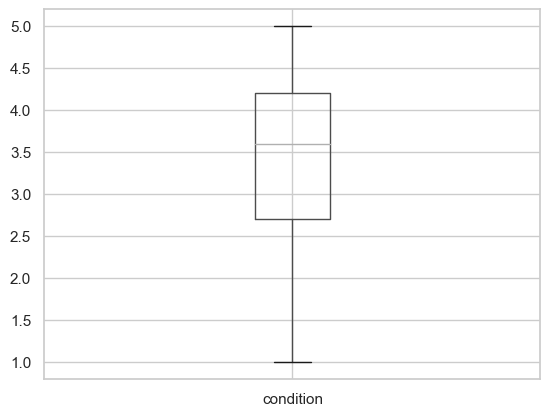

In [132]:
# Посмотрим на график "ящик с усами" по столбцу condition
data_train.boxplot(column=['condition'])
plt.show()

Ничего странного, включая выбросы, график не показывает. Однако, вернувшись к изучению данных посредством вывода гистограммы, мы помним, что в данных львиная доля состояния авто варьируется от 2 до 4,5, но и ниже 2 данные такдже присутствуют.

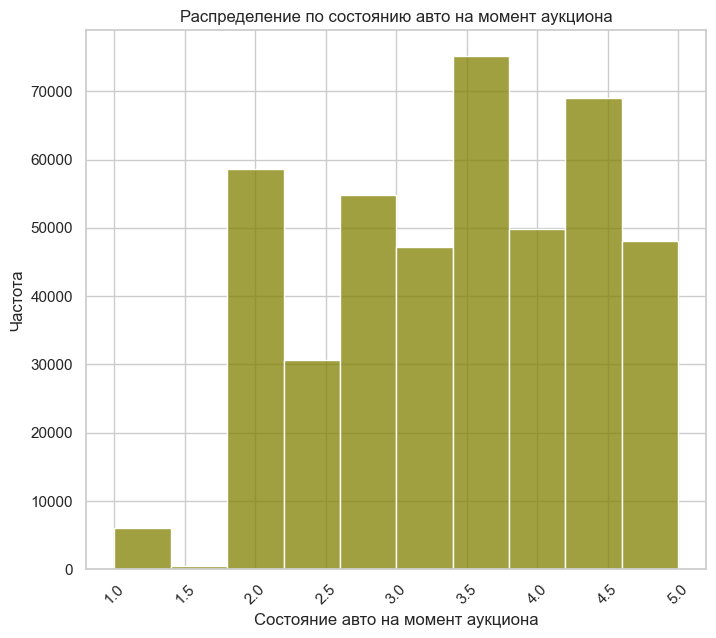

In [133]:
# Выводим гистограмму по столбцу condition в обучающем датасете
# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(8, 7))

# Создаем гистограмму
sns.histplot(data_train['condition'], bins=10, color='olive')

# Задаем название по оси X и Y
plt.xlabel('Состояние авто на момент аукциона')
plt.ylabel('Частота')
plt.title('Распределение по состоянию авто на момент аукциона')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

Посмотрим какой процент составляют данные с состоянием, скажем ниже 1,5.

In [134]:
# Узнаем процент данных с состоянием ниже 1,5
data_train[data_train['condition'] < 1.5].shape[0] / data_train.shape[0] * 100

1.400913491035517

Процент данных равен 1.4, что ниже 10 и считается возможным к удалению. Так и поступим, удалим данные из обучающего датасета с состоянием авто ниже 1.5.

In [135]:
data_train = data_train[data_train['condition'] > 1.5]

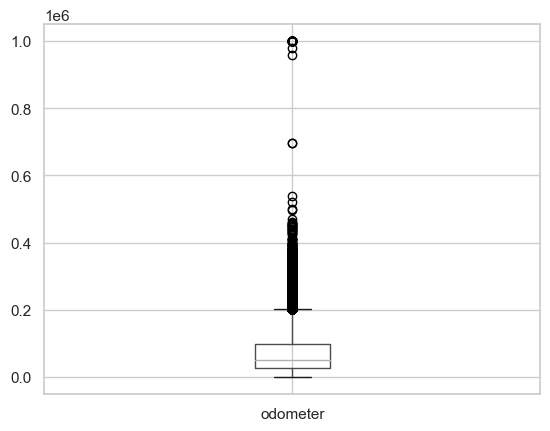

In [136]:
# Посмотрим на график "ящик с усами" по столбцу odometer
data.boxplot(column='odometer')
plt.show()

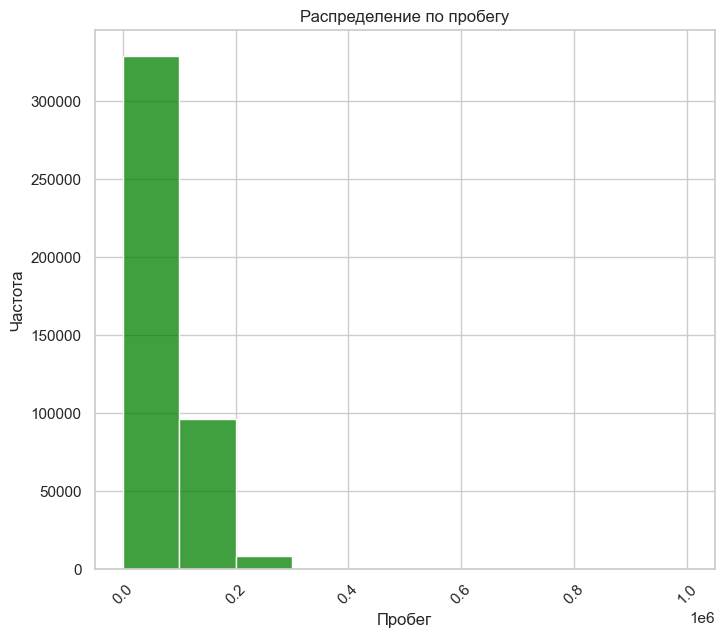

In [137]:
# Дополнительно выводим гистограмму по столбцу odometer

# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(8, 7))

# Создаем гистограмму
sns.histplot(data_train['odometer'], bins=10, color='green')

# Задаем название по оси X и Y
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.title('Распределение по пробегу')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

Оба графика показывают, что присутствуют выбросы, а именно авто с пробегом более 200к км / миль.

In [138]:
# Узнаем процент данных с пробегом более 200к км / миль
data_train[data_train['odometer'] >= 200000].shape[0] / data_train.shape[0] * 100

2.052874485340563

Выбросы (пробег более 200к км / миль) состовляют чуть больше 2 процентов, принимаем решение об удалении данных выбросов из обучающего датасета.

In [139]:
# Удаляем выбросы из столбца odometer с пробегом больше 200к
data_train = data_train[data_train['odometer'] < 200000]

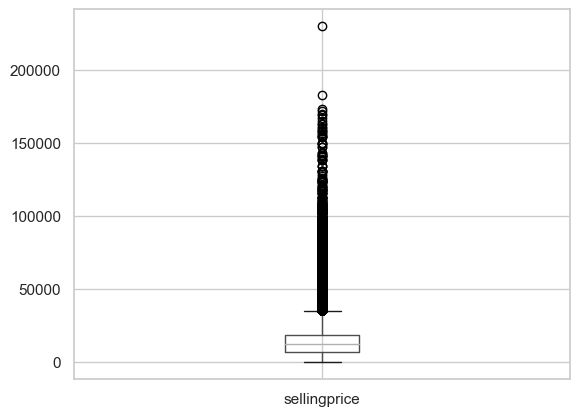

In [140]:
# Посмотрим на график "ящик с усами" по столбцу sellingprice
data.boxplot(column='sellingprice')
plt.show()

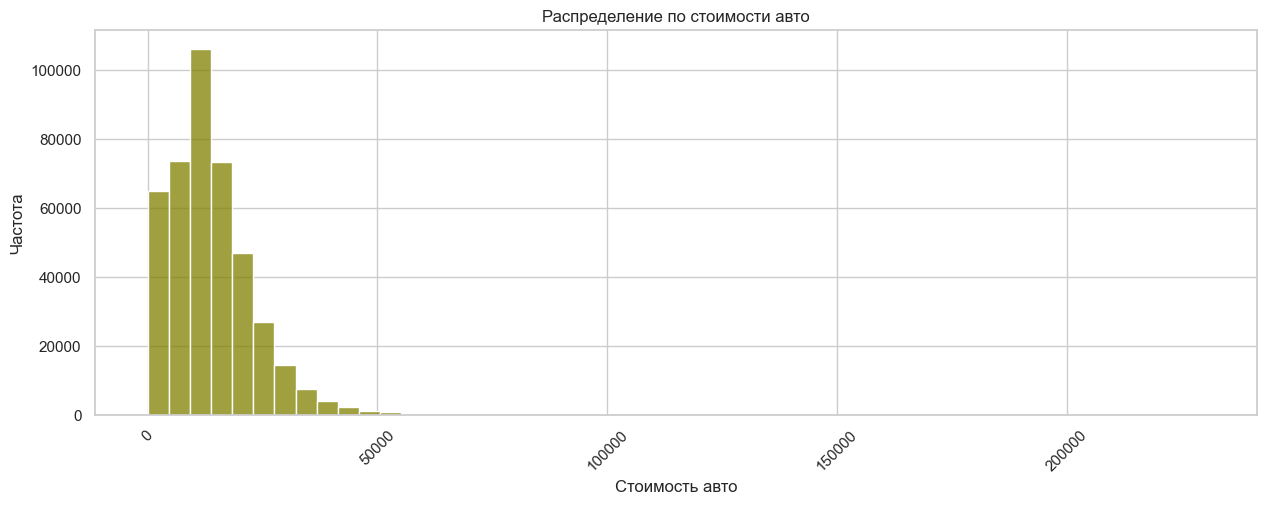

In [141]:
# Дополнительно выводим гистограмму по столбцу sellingprice

# Задаем стиль
sns.set(style="whitegrid")

# Задаем размер
plt.figure(figsize=(15, 5))

# Создаем гистограмму
sns.histplot(data_train['sellingprice'], bins=50, color='olive')

# Задаем название по оси X и Y
plt.xlabel('Стоимость авто')
plt.ylabel('Частота')
plt.title('Распределение по стоимости авто')

plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

График "ящик с усами" и гистограмма показывают нам, что основная доля данных сосредоточена между 0 и примерно 35000. Посчитаем какой процент данных содержит записи со стоимостью больше 35000.

In [142]:
# Считаем процент авто с ценой выше 40000
data_train[data_train['sellingprice'] > 35000].shape[0] / data.shape[0] * 100



2.9887656656034878

Записи со стоимостью авто больше 35000 насчитывают всего 3%. Принимаем решение удалить выбросы в столбце sellingprice со значениями, превыщающими 35000.

In [143]:
# Удаляем выбросы из столбца sellingprice в обучающем датасете
data_train = data_train[data_train['sellingprice'] < 35000]

In [144]:
# Смотрим на количество строк после очистки данных от выбросов
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411611 entries, 0 to 440235
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          411611 non-null  int64         
 1   make          411611 non-null  object        
 2   model         411611 non-null  object        
 3   trim          411611 non-null  object        
 4   body          411611 non-null  object        
 5   transmission  411611 non-null  object        
 6   vin           411611 non-null  object        
 7   state         411611 non-null  object        
 8   condition     411611 non-null  float64       
 9   odometer      411611 non-null  float64       
 10  color         411611 non-null  object        
 11  interior      411611 non-null  object        
 12  seller        411611 non-null  object        
 13  sellingprice  411611 non-null  int64         
 14  saledate      411611 non-null  object        
 15  rev_saledate  411

In [145]:
# Проверяем какое количество данных в процентном соотношении мы удалили
data_train.shape[0] / 440236 * 100

93.49780572238527

Всего было удалено чуть больше 6%, что считается нормальным (меньше 10%).

Продолжим формировать новые признаки, будем создавать числовые признаки с помощью имеющейся информации в целевом признаке sellingprice.

In [146]:
# Считаем медианную стоимость по каждому году
# Применяем функцию pd.pivot_table к столбцам sellingprice и year, 
# а также используем функцию aggfunc для расчета медианной стоимости
median_price_year = pd.pivot_table(
    data_train,
    values='sellingprice',
    index='year',
    aggfunc='median'
)

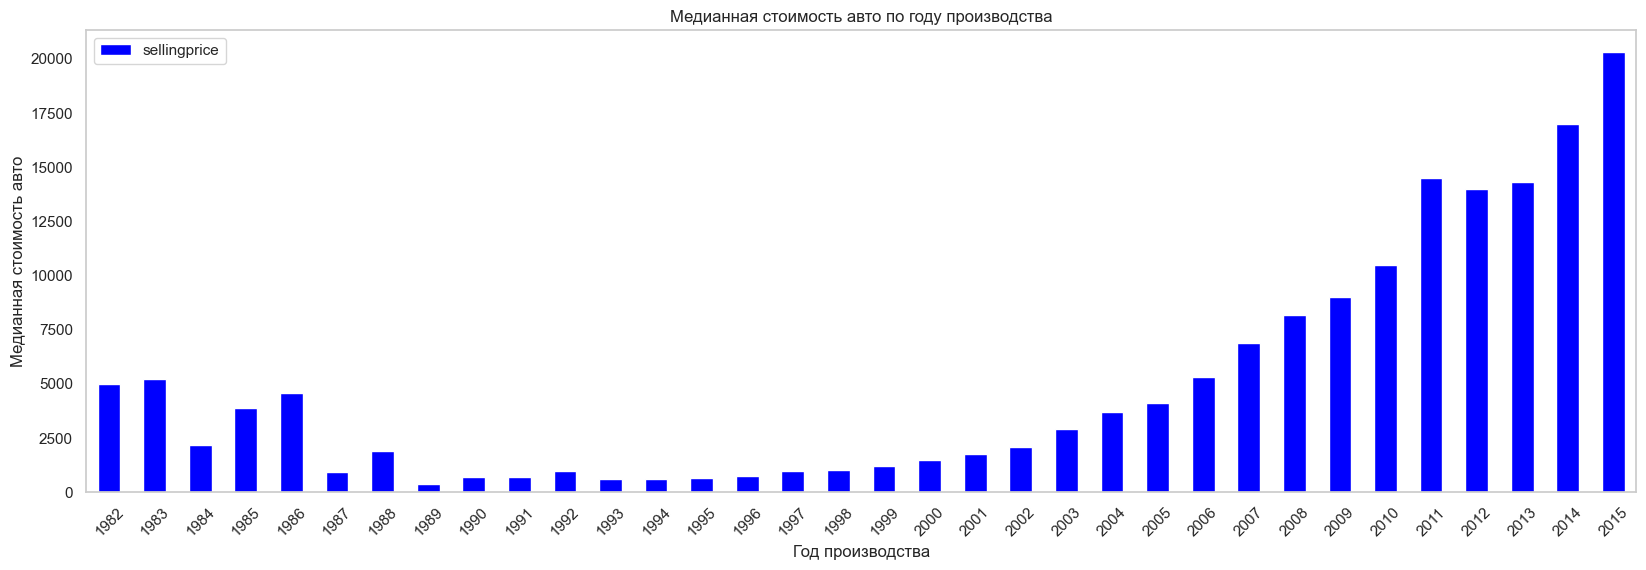

In [147]:
# Смотрим распределение медианной цены по году производства авто с помощью гистограммы
median_price_year.plot(kind='bar', color='blue', grid=False, figsize=(20, 6))

# Задаем название по оси X и Y
plt.xlabel('Год производства')
plt.ylabel('Медианная стоимость авто')
plt.title('Медианная стоимость авто по году производства')

# Направляем названия по оси Х под 45 градусов
plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

Из получнных данных видно, что медианная стоимость, начиная с 1982 года (начало полученных данных) снижается до 1989 года, после чего наблюдается повышательный тренд вплоть до 2015 года. Создадим новый признак отражающий эти данные.

In [148]:
# Создаем новый столбец с медианной стоимостью и распределением по году производства авто в обучающем датасете
for year in data_train['year'].unique():
    data_train.loc[data_train['year'] == year, 'median_price_year'] = median_price_year.loc[year, 'sellingprice']

In [149]:
# Создаем новый столбец с медианной стоимостью и распределением по году производства авто в тестовом датасете
for year in data_test['year'].unique():
    data_test.loc[data_test['year'] == year, 'median_price_year'] = median_price_year.loc[year, 'sellingprice']

In [150]:
# Проверим на количество пропусков
print(data_train['median_price_year'].isna().sum())
print(data_test['median_price_year'].isna().sum())

0
0


In [151]:
# Посмотрим распределение медианной цены по каждому производителю авто
median_price_make = pd.pivot_table(
    data_train,
    values='sellingprice',
    index='make',
    aggfunc='median'
)

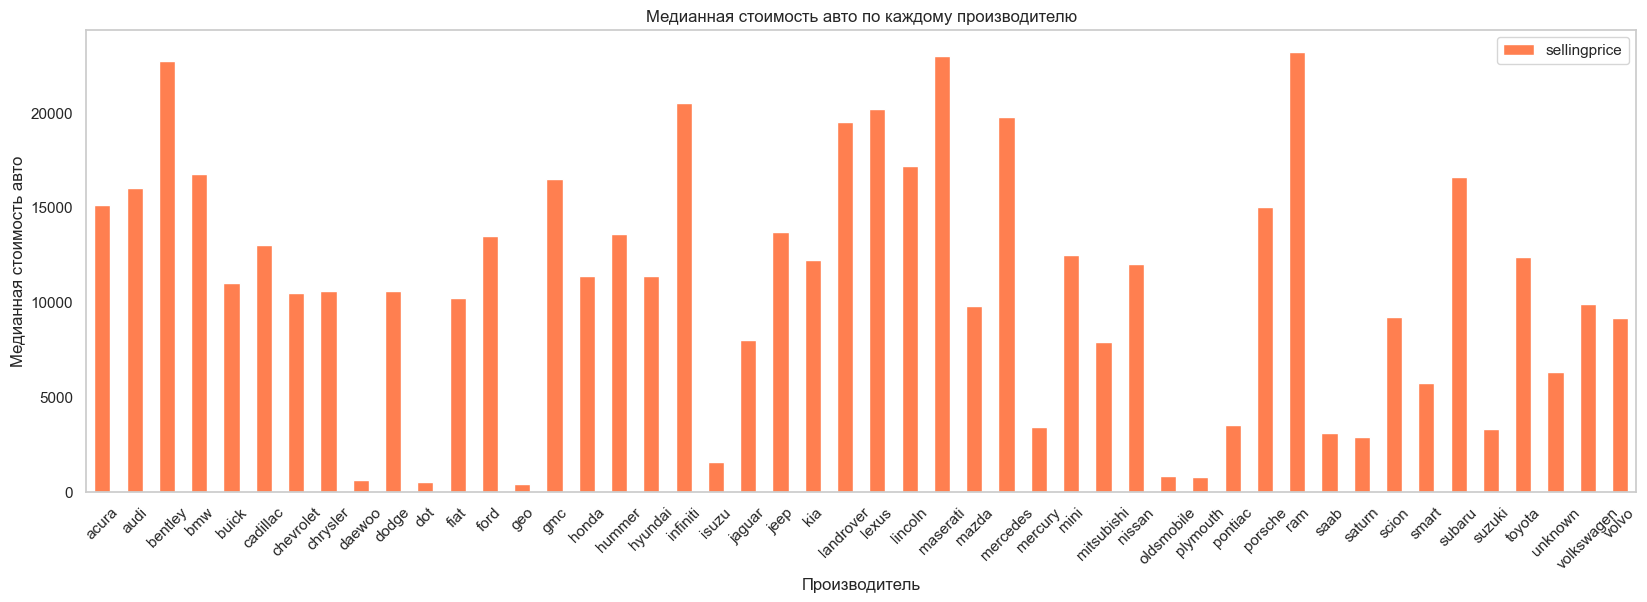

In [152]:
# Смотрим распределение медианной цены по производителю авто с помощью гистограммы
median_price_make.plot(kind='bar', color='coral', grid=False, figsize=(20, 6))

# Задаем название по оси X и Y
plt.xlabel('Производитель')
plt.ylabel('Медианная стоимость авто')
plt.title('Медианная стоимость авто по каждому производителю')

# Направляем названия по оси Х под 45 градусов
plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

И здесь мы видим, что медианная стоимость в зависимости от марки авто колеблится в разных диапазонах. Закономерно, что стоимость премиальных авто существенно выше. Создадим новый признак.

In [153]:
# Создаем новый столбец с медианной стоимостью и распределением по производителю авто в обучающем датасете
for make in data_train['make'].unique():
    data_train.loc[data_train['make'] == make, 'median_price_make'] = median_price_make.loc[make, 'sellingprice']

In [154]:
# Создаем новый столбец с медианной стоимостью и распределением по производителю авто в тестовом датасете

for make in data_test['make'].unique():
    if make in median_price_make.index:
        data_test.loc[data_test['make'] == make, 'median_price_make'] = median_price_make.loc[make, 'sellingprice']
# Также заполняем возможные пропуски значением 0
    else:
        data_test.loc[data_test['make'] == make, 'median_price_make'] = 0

In [155]:
# Проверим на количество пропусков
print(data_train['median_price_make'].isna().sum())
print(data_test['median_price_make'].isna().sum())

0
0


In [156]:
# Посмотрим распределение медианной цены по каждой модели авто
median_price_model = pd.pivot_table(
    data_train,
    values='sellingprice',
    index='model',
    aggfunc='median'
)

In [157]:
# Смотрим распределение медианной цены по модели авто
median_price_model.head(10)

,sellingprice
model,
1 series,19400.0
1500,22700.0
190-class,575.0
2 series,30500.0
200,10700.0
200sx,750.0
2500,27400.0
3,11000.0
3 series,16400.0


Из полученных данных видно, что медианная стоимость в зависимости от модели также разнятся. Создадим новый столбец с данным признаком.

In [158]:
# Создаем новый столбец с медианной стоимостью и распределением по модели авто в обучающем датасете
for model in data_train['model'].unique():
    data_train.loc[data_train['model'] == model, 'median_price_model'] = median_price_model.loc[model, 'sellingprice']

In [159]:
# Создаем новый столбец с медианной стоимостью и распределением по модели авто в тестовом датасете
for model in data_test['model'].unique():
    if model in median_price_model.index:
        data_test.loc[data_test['model'] == model, 'median_price_model'] = median_price_model.loc[model, 'sellingprice']
# Также заполняем возможные пропуски значением 0
    else:
        data_test.loc[data_test['model'] == model, 'median_price_model'] = 0

In [160]:
# Проверим на количество пропусков
print(data_train['median_price_model'].isna().sum())
print(data_test['median_price_model'].isna().sum())

0
0


In [161]:
# Посмотрим распределение медианной цены по каждой штату, где продавалось авто
median_price_state = pd.pivot_table(
    data_train,
    values='sellingprice',
    index='state',
    aggfunc='median'
)

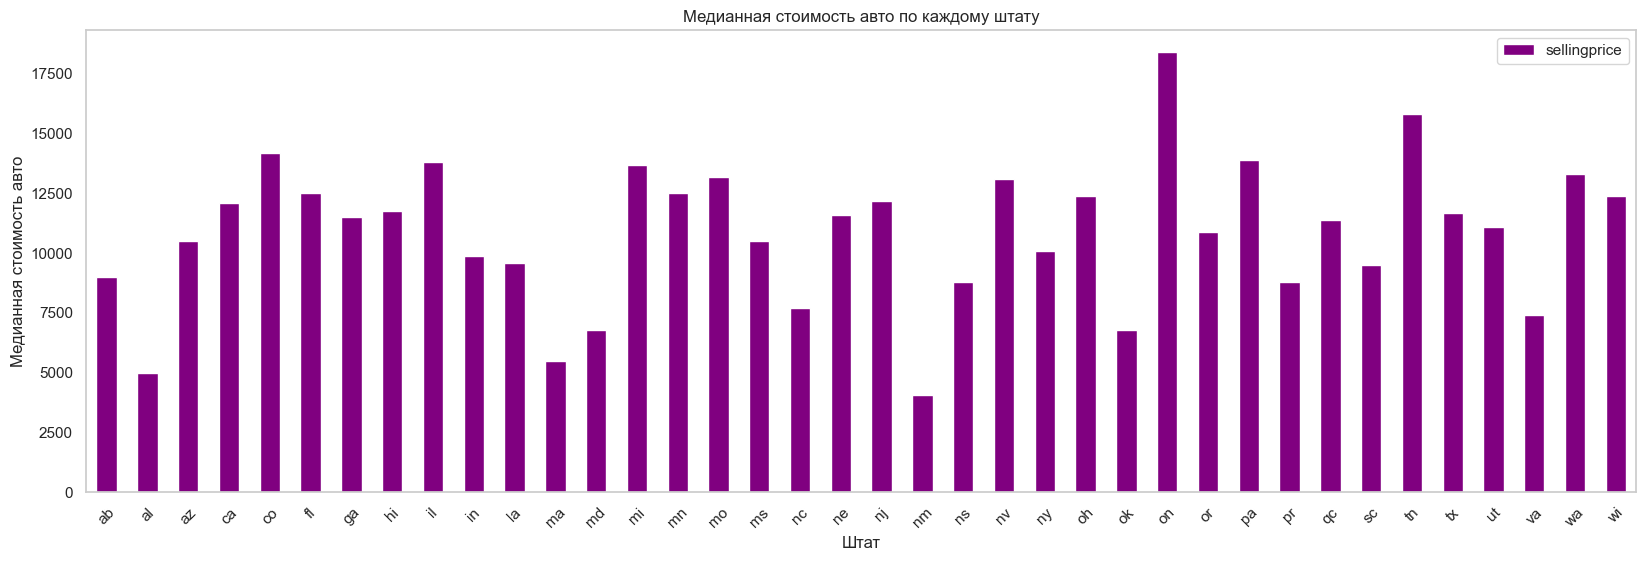

In [162]:
# Смотрим распределение медианной цены по штату с помощью гистограммы
median_price_state.plot(kind='bar', color='purple', grid=False, figsize=(20, 6))

# Задаем название по оси X и Y
plt.xlabel('Штат')
plt.ylabel('Медианная стоимость авто')
plt.title('Медианная стоимость авто по каждому штату')

# Направляем названия по оси Х под 45 градусов
plt.xticks(rotation=45)

# Выводим гистограмму
plt.show()

Как мы видим, медианная стоимость существенно отличается в зависимости от штата, где авто продавалось. Создадим новый столбец и запишем в него данные о медианной стоимости с распределением по штату.

In [163]:
# Создаем новый столбец с медианной стоимостью с распределением по штату в обучающем датасете
for state in data_train['state'].unique():
    data_train.loc[data_train['state'] == state, 'median_price_state'] = median_price_state.loc[state, 'sellingprice']

In [164]:
# Создаем новый столбец с медианной стоимостью с распределением по штату в тестовом датасете
# для тестового набора данных
for state in data_test['state'].unique():
    data_test.loc[data_test['state'] == state, 'median_price_state'] = median_price_state.loc[state, 'sellingprice']

In [165]:
# Проверим на количество пропусков
print(data_train['median_price_state'].isna().sum())
print(data_test['median_price_state'].isna().sum())

0
0


Пропусков не обнаружено.

In [166]:
# Посмотрим распределение медианной цены по каждому продавцу авто
median_price_seller = pd.pivot_table(
    data_train,
    values='sellingprice',
    index='seller',
    aggfunc='median'
)

In [167]:
median_price_seller.head(10)

,sellingprice
seller,
1 cochran of monroeville,3975.0
1 for all auto sales,5600.0
1360250 alberta ltd.,3000.0
138 auto inc,10600.0
143 auto sales inc,6300.0
1479582 alberta ltd.,4500.0
1491081 alberta inc.,9900.0
159191 canada inc,18100.0
1764175 alberta ltd,3200.0


In [168]:
# Создаем новый столбец с медианной стоимостью и распределением по продавцу авто в обучающем датасете
for seller in data_train['seller'].unique():
    data_train.loc[data_train['seller'] == seller, 'median_price_seller'] = median_price_seller.loc[seller, 'sellingprice']

In [169]:
# Создаем новый столбец с медианной стоимостью и распределением по продавцу авто в тестовом датасете
# для тестового набора данных
for seller in data_test['seller'].unique():
    if seller in median_price_seller.index:
        data_test.loc[data_test['seller'] == seller, 'median_price_seller'] = median_price_seller.loc[seller, 'sellingprice']
# Также заполняем возможные пропуски значением 0
    else:
        data_test.loc[data_test['seller'] == seller, 'median_price_seller'] = 0

In [170]:
# Проверим на количество пропусков
print(data_train['median_price_seller'].isna().sum())
print(data_test['median_price_seller'].isna().sum())

0
0


In [171]:
# Прверяем вновь созданные признаки методом head() в обучающем датасете
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,rev_saledate,year_sale,month_sale,weekday_sale,num_years,median_price_year,median_price_make,median_price_model,median_price_state,median_price_seller
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015,2015-06-02,2015,6,1,4,14500.0,13500.0,20000.0,6800.0,7500.0
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015,2015-02-25,2015,2,2,1,17000.0,13500.0,12700.0,13200.0,16800.0
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015,2015-06-10,2015,6,2,3,14000.0,12000.0,9800.0,12200.0,13500.0
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015,2015-06-17,2015,6,2,12,2900.0,13600.0,17100.0,11700.0,14100.0
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015,2015-02-03,2015,2,1,8,6900.0,13500.0,12700.0,6800.0,650.0


In [172]:
# Прверяем вновь созданные признаки методом head() в тестовом датасете
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,rev_saledate,year_sale,month_sale,weekday_sale,num_years,median_price_year,median_price_make,median_price_model,median_price_state,median_price_seller
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015,2015-01-14,2015,1,2,10,4100.0,13000.0,9350.0,12100.0,5850.0
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015,2015-02-27,2015,2,4,1,17000.0,16500.0,20200.0,13900.0,19600.0
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015,2015-02-24,2015,2,1,2,14300.0,12000.0,14300.0,12400.0,13500.0
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015,2015-03-06,2015,3,4,2,14300.0,10500.0,7700.0,12500.0,7750.0
4,2013,nissan,titan,sv,cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015,2015-06-03,2015,6,2,2,14300.0,12000.0,11650.0,15800.0,18750.0


Используя столбец с данными о vin номерах (vehicle identification number) мы сможем добавить признак, определяющий регион производства. Для данного преобразования информация была взята с ресурса: https://uaw.org/standing-committees/union-label/how-to-read-your-vin/

In [173]:
# Создаем функцию, которая определяет регион производства авто
def vin_production_region(row):
    if row[0] in '145':
        return 1 # USA
    if row[0] in '2':
        return 2 # canada
    if row[0] in '3':
        return 3 # mexico
    if row[0] in '6':
        return 4 # australia
    if row[0] in '7':
        return 5 # new zeland
    if row[0] in '89':
        return 6 # south america
    if row[0] in 'abcdefgh':
        return 7 # africa
    if row[0] in 'jklmnopqr':
        return 8 # asia
    else:
        return 9 # europe

In [174]:
# Создаем новый признак, указывающий на регион производства авто в обучающем датасете
# Применяем ранее созданную функцию
# для обучающего набора данных
data_train['prod_region'] = data_train['vin'].apply(vin_production_region)


In [175]:
# Создаем новый признак, указывающий на регион производства авто в тестовом датасете
# Применяем ранее созданную функцию
# для обучающего набора данных
data_test['prod_region'] = data_test['vin'].apply(vin_production_region)

In [176]:
# Проверим на количество пропусков
print(data_train['prod_region'].isna().sum())
print(data_test['prod_region'].isna().sum())

0
0


Также, мы можем сделать категоризацию стоимости авто и разбить ее на классы, скажем класс 1, класс 2 и класс 3.
Клаассы определим по медианной стоимости модели авто. Разобьем классы исходя из следующей классификации:

- Класс 1: самые дорогие со стоимостью больше 30к
- Класс 2: средние по стоимости, больше 10к и меньше 30к
- Класс 3: с наименьшей стоимостью, то есть ниже 10к

In [177]:
# Создаем новый признак с классом авто по стоимости для обучающего датасета
data_train.loc[data_train['median_price_model'] > 30000, 'model_class'] = 1
data_train.loc[((data_train['median_price_model'] > 10000) & (data_train['median_price_model'] <= 30000)), 'model_class'] = 2
data_train.loc[data_train['median_price_model'] <= 10000, 'model_class'] = 3

In [178]:
# Создаем новый признак с классом авто по стоимости для тестового датасета
data_test.loc[data_test['median_price_model'] > 30000, 'model_class'] = 1
data_test.loc[((data_test['median_price_model'] > 10000) & (data_test['median_price_model'] <= 30000)), 'model_class'] = 2
data_test.loc[data_test['median_price_model'] <= 10000, 'model_class'] = 3

In [179]:
# Проверим на количество пропусков
print(data_train['model_class'].isna().sum())
print(data_test['model_class'].isna().sum())

0
0


In [180]:
# Сбрасываем индекс после всех преобразований
data_train.reset_index(inplace=True, drop=True)

In [181]:
# Проверим сделанные преобразования в обучающем датасете
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411611 entries, 0 to 411610
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   year                 411611 non-null  int64         
 1   make                 411611 non-null  object        
 2   model                411611 non-null  object        
 3   trim                 411611 non-null  object        
 4   body                 411611 non-null  object        
 5   transmission         411611 non-null  object        
 6   vin                  411611 non-null  object        
 7   state                411611 non-null  object        
 8   condition            411611 non-null  float64       
 9   odometer             411611 non-null  float64       
 10  color                411611 non-null  object        
 11  interior             411611 non-null  object        
 12  seller               411611 non-null  object        
 13  sellingprice  

In [182]:
# Проверим сделанные преобразования в тестовом датасете
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   year                 110058 non-null  int64         
 1   make                 110058 non-null  object        
 2   model                110058 non-null  object        
 3   trim                 110058 non-null  object        
 4   body                 110058 non-null  object        
 5   transmission         110058 non-null  object        
 6   vin                  110058 non-null  object        
 7   state                110058 non-null  object        
 8   condition            110058 non-null  float64       
 9   odometer             110058 non-null  float64       
 10  color                110058 non-null  object        
 11  interior             110058 non-null  object        
 12  seller               110058 non-null  object        
 13  saledate      

После всех преобразований необходимо посмотреть на корреляцию всех признаков к целевому признаку sellingprice.

In [183]:
# Смотрим на корреляцию признаков к целевому признаку sellingprice в обучающем датасете
corr_train= data_train.corr(method='pearson')['sellingprice'][:]
corr_train

year                   0.644130
condition              0.570298
odometer              -0.653386
sellingprice           1.000000
year_sale              0.088747
month_sale            -0.048181
weekday_sale           0.081903
num_years             -0.641200
median_price_year      0.653727
median_price_make      0.382190
median_price_model     0.622621
median_price_state     0.242470
median_price_seller    0.699954
prod_region            0.062841
model_class           -0.418844
Name: sellingprice, dtype: float64

По результатам изучения данных корреляции признаков к целевому признаку sellingprice, можно сделать следующие выводы:

1. Положительная корреляция - это корреляция при которой значение целевого признака увеличивается вместе с увеличением значения нецелевого признака

Положительная корреляция наблюдается у таких признаков как year (год производства авто), condition (состояние авто на момент аукциона), median_price_year (медианная цена авто по году производства), median_price_model (медианная цена авто по модели авто), median_price_seller (медианная цена авто по продавцу).

2. Отрицательная корреляция - это корреляция, при которой с увеличением значения нецелевого признака, значение целевого признака уменьшается

Отрицательная корреляция наблюдается у следующих признаков: odometer (пробег авто), month_sale (месяц продажи), num_years(возраст авто на момент продажи). При увеличении значения этих признаков, стоимость снижается.

3. Слабая полижительная корреляция - это корреляция при которой признаки не сильно влияют на целевой признак

Слабая положительная корреляция присуща таким признакам как year_sale (год продажи), weekday_sale (день недели продажи), median_price_state (медианная стоимость по штату, где авто продавалось), prod_region (регион производства).

**Вывод по шагу 6**

Касательно обработки выбросов, то мы обработали данные и удалили в общем чуть больше 6% из таких числовых столбцов как condition, odometer и sellingprice.

Что касатеся формирования новых признаков, то мы создали следующие столбцы:

- num_years (возраст авто на момент продажи)
- median_price_year (медианное значение цены по годам производства авто)
- median_price_make (медианное значение цены по производителям)
- median_price_model (медианное значение цены по модели авто)
- median_price_state (медианное значение цены по штату, где авто было продано)
- median_price_seller (медианное значение цены по продавцу авто)
- prod_region (классификация региона производства авто, полученная из данных vin)

Проверили прлопуски во вновь созданных признаках и обработали их в тестовом датасете.

После всех преобразований посмотрели на корреляцию признаков. Из числа признаков, которые положительно коррелируют с целевым признаком можно выделить: year (год производства авто), condition (состояние авто на момент аукциона), median_price_year (медианная цена авто по году производства), median_price_model (медианная цена авто по модели авто), median_price_seller (медианная цена авто по продавцу).

Отрицательная корреляция прослеживается у таких признаков как odometer (пробег авто), month_sale (месяц продажи), num_years(возраст авто на момент продажи).

Переходим к этапу подготовки данных к обучению моделей.

**Шаг 7. Подготовка данных к обучению на них модели**

Первым шагом нам необходимо создать переменную с целевым признаком, после чего требуется очистить датасет от признаков, которые не будут влиять на обучение модели. 

Поскольку наши датасеты имеют категориальные, следущим шагом необходимо сделать стандартизацию признаков. Для категориальных признаков мы будем использовать технику кодирования с помощью OrdinalEncoder, сохраняющую порядковые отношения между категориями. 

После стандартизации категориальных признаков и приведения их к численному виду, мы прделаем шаг масштабирования признаков с помощью StandardScaller.

Затем подберем гиперпараметры с помощью GridSearchCV и определим что необходимо использовать при обучении моделей.



In [184]:
# Первым делом записваем целевой признак в переменную tagrget
target = data_train['sellingprice']

Для обучения моделей оптимизируем данные путем исключения некоторых признаков, которые либо не важны, либо имеют небольшую корреляцию с целевым признаком sellingprice.

In [185]:
# Перезаписываем обучающий датасет с оптимизированными признаками
data_train = data_train.drop([
    'year', # удаляем, так как у нас имеется признак medium_price_year
    'vin', # удаляем, поскольку данный признак не важен для обучения моделей
    'state', # удаляем, так как у нас имеется признак medium_price_state
    'seller', # удаляем, так как у нас имеется признак medium_price_seller
    'saledate', # удаляем, так как у нас имеется признак medium_price_year, а также medium_price_month
    'rev_saledate', # удаляем, так как у нас имеется признак medium_price_year, а также medium_price_month
    'month_sale', # удаляем, так как корреляция небольшая (отрицательная)
    'weekday_sale', # удаляем, так как очень маленькая корреляция
    'num_years', # удаляем, так как у нас имеется признак medium_price_year
    'sellingprice' # удаляем, поскольку это целевой признак
], axis=1)

In [186]:
# Перезаписываем обучающий датасет с оптимизированными признаками
# Признака sellingprice  в данном датасете не было изначально
data_test = data_test.drop([
    'year', # удаляем, так как у нас имеется признак medium_price_year
    'vin', # удаляем, поскольку данный признак не важен для обучения моделей
    'state', # удаляем, так как у нас имеется признак medium_price_state
    'seller', # удаляем, так как у нас имеется признак medium_price_seller
    'saledate', # удаляем, так как у нас имеется признак medium_price_year, а также medium_price_month
    'rev_saledate', # удаляем, так как у нас имеется признак medium_price_year, а также medium_price_month
    'month_sale', # удаляем, так как корреляция небольшая (отрицательная)
    'weekday_sale', # удаляем, так как очень маленькая корреляция
    'num_years', # удаляем, так как у нас имеется признак medium_price_year
], axis=1)

In [187]:
# Проверяем сделанные преобразования методом shape
print(data_train.shape)
print(data_test.shape)


(411611, 17)
(110058, 17)


Следющим шагом переходим к преобразованию категориальных признаков путем прямого кодирования с помощью OrdinalEncoder

In [188]:
# Создаем список категорилаьных признаков, которые будем кодировать
cat_columns = [
    'make',
    'model',
    'trim',
    'body',
    'transmission',
    'color',
    'interior'
]

In [189]:
# Записываем в переменную категориальные признаки обучающего датасета
cat_features = data_train.loc[:, cat_columns]

In [190]:
# Записываем в переменную категориальные признаки тестового датасета
cat_features_test = data_test.loc[:, cat_columns]

In [191]:
# Используем энкодэр OrdinalEncoder для кодировки категориальных признаков
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Параметр handle_unknown установлен на значение 'use_encoded_value'. Этот параметр определяет, как энкодер будет обрабатывать неизвестные категории (то есть категории, которые отсутствуют в данных). Установив его в 'use_encoded_value', энкодер будет присваивать уникальное значение неизвестным категориям во время процесса кодирования.

Параметр unknown_value установлен на значение -1. Этот параметр задает значение, которое будет присвоено неизвестным категориям. В данном случае, -1 используется в качестве заполнителя для неизвестных категорий.

In [192]:
# Обучаем и применяем энкодер к обучающему датасету
enc.fit(cat_features)
cat_features = enc.transform(cat_features)
cat_features = pd.DataFrame(cat_features)
cat_features.columns = cat_columns
cat_features

,make,model,trim,body,transmission,color,interior
0,12.0,224.0,1304.0,7.0,0.0,1.0,1.0
1,12.0,297.0,1273.0,5.0,0.0,1.0,1.0
2,32.0,618.0,67.0,5.0,0.0,1.0,1.0
3,16.0,352.0,535.0,7.0,0.0,6.0,0.0
4,12.0,297.0,1304.0,5.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
411606,22.0,492.0,763.0,5.0,0.0,18.0,0.0
411607,30.0,170.0,1231.0,10.0,0.0,18.0,1.0
411608,3.0,32.0,450.0,2.0,0.0,7.0,1.0
411609,37.0,6.0,1357.0,0.0,0.0,18.0,6.0


In [193]:
# обучаем и применяем его к тестовому набору
cat_features_test = enc.transform(cat_features_test)
cat_features_test = pd.DataFrame(cat_features_test)
cat_features_test.columns = cat_columns
cat_features_test


,make,model,trim,body,transmission,color,interior
0,5.0,188.0,535.0,5.0,0.0,15.0,1.0
1,14.0,612.0,175.0,9.0,0.0,18.0,6.0
2,32.0,475.0,1224.0,7.0,0.0,7.0,1.0
3,6.0,365.0,1032.0,5.0,0.0,15.0,1.0
4,32.0,689.0,1442.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
110053,21.0,743.0,1379.0,7.0,0.0,11.0,1.0
110054,24.0,375.0,535.0,5.0,0.0,7.0,1.0
110055,32.0,440.0,238.0,5.0,0.0,15.0,6.0
110056,32.0,20.0,535.0,2.0,1.0,17.0,1.0


In [194]:
# Следующим шагом заменяем категориальные столбцы преобразованными данными
data_train = data_train.drop(cat_columns, axis=1)

In [195]:
# Проверяем сделанные преобразования
data_train

,condition,odometer,year_sale,median_price_year,median_price_make,median_price_model,median_price_state,median_price_seller,prod_region,model_class
0,4.2,111041.0,2015,14500.0,13500.0,20000.0,6800.0,7500.0,2,2.0
1,3.5,31034.0,2015,17000.0,13500.0,12700.0,13200.0,16800.0,3,2.0
2,2.2,35619.0,2015,14000.0,12000.0,9800.0,12200.0,13500.0,3,3.0
3,2.8,131301.0,2015,2900.0,13600.0,17100.0,11700.0,14100.0,1,2.0
4,2.0,127709.0,2015,6900.0,13500.0,12700.0,6800.0,650.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...
411606,4.5,20434.0,2015,14300.0,12200.0,14300.0,12100.0,15100.0,8,2.0
411607,2.9,14675.0,2015,17000.0,12500.0,18500.0,12400.0,13750.0,9,2.0
411608,3.7,102552.0,2015,8200.0,16750.0,16200.0,12100.0,16750.0,9,2.0
411609,3.0,29367.0,2015,17000.0,23200.0,27400.0,11700.0,30600.0,3,2.0


In [196]:
# Проверяем наличие пропусков
data_train.isna().sum()

condition              0
odometer               0
year_sale              0
median_price_year      0
median_price_make      0
median_price_model     0
median_price_state     0
median_price_seller    0
prod_region            0
model_class            0
dtype: int64

In [197]:
# Следующим шагом объединяем преобразованные данные
data_train = pd.merge(data_train, cat_features, left_index=True, right_index=True)

In [198]:
# Проверяем размерность
data_train.shape

(411611, 17)

In [199]:
# Смотрим на данные методом info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411611 entries, 0 to 411610
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   condition            411611 non-null  float64
 1   odometer             411611 non-null  float64
 2   year_sale            411611 non-null  int64  
 3   median_price_year    411611 non-null  float64
 4   median_price_make    411611 non-null  float64
 5   median_price_model   411611 non-null  float64
 6   median_price_state   411611 non-null  float64
 7   median_price_seller  411611 non-null  float64
 8   prod_region          411611 non-null  int64  
 9   model_class          411611 non-null  float64
 10  make                 411611 non-null  float64
 11  model                411611 non-null  float64
 12  trim                 411611 non-null  float64
 13  body                 411611 non-null  float64
 14  transmission         411611 non-null  float64
 15  color            

In [200]:
# Проделываем те же преобразования для тестового датасета
data_test = data_test.drop(cat_columns, axis=1)
data_test = pd.merge(data_test, cat_features_test, left_index=True, right_index=True)
data_test


,condition,odometer,year_sale,median_price_year,median_price_make,median_price_model,median_price_state,median_price_seller,prod_region,model_class,make,model,trim,body,transmission,color,interior
0,2.7,116970.0,2015,4100.0,13000.0,9350.0,12100.0,5850.0,1,3.0,5.0,188.0,535.0,5.0,0.0,15.0,1.0
1,4.4,6286.0,2015,17000.0,16500.0,20200.0,13900.0,19600.0,1,2.0,14.0,612.0,175.0,9.0,0.0,18.0,6.0
2,4.6,11831.0,2015,14300.0,12000.0,14300.0,12400.0,13500.0,8,2.0,32.0,475.0,1224.0,7.0,0.0,7.0,1.0
3,2.3,57105.0,2015,14300.0,10500.0,7700.0,12500.0,7750.0,2,3.0,6.0,365.0,1032.0,5.0,0.0,15.0,1.0
4,2.9,31083.0,2015,14300.0,12000.0,11650.0,15800.0,18750.0,1,2.0,32.0,689.0,1442.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,3.8,66085.0,2015,14500.0,13700.0,21800.0,12100.0,10600.0,1,2.0,21.0,743.0,1379.0,7.0,0.0,11.0,1.0
110054,4.8,17588.0,2015,17000.0,20200.0,20750.0,12500.0,24250.0,8,2.0,24.0,375.0,535.0,5.0,0.0,7.0,1.0
110055,2.9,124036.0,2015,3700.0,12000.0,15300.0,7400.0,8800.0,1,2.0,32.0,440.0,238.0,5.0,0.0,15.0,6.0
110056,2.2,27169.0,2015,14300.0,12000.0,21900.0,11700.0,12500.0,8,2.0,32.0,20.0,535.0,2.0,1.0,17.0,1.0


In [201]:
# Смотрим на данные методом info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   condition            110058 non-null  float64
 1   odometer             110058 non-null  float64
 2   year_sale            110058 non-null  int64  
 3   median_price_year    110058 non-null  float64
 4   median_price_make    110058 non-null  float64
 5   median_price_model   110058 non-null  float64
 6   median_price_state   110058 non-null  float64
 7   median_price_seller  110058 non-null  float64
 8   prod_region          110058 non-null  int64  
 9   model_class          110058 non-null  float64
 10  make                 110058 non-null  float64
 11  model                110058 non-null  float64
 12  trim                 110058 non-null  float64
 13  body                 110058 non-null  float64
 14  transmission         110058 non-null  float64
 15  color            

Теперь необходимо масштабировать данные с помощью StandardScaller

In [202]:
# Создаем объект функции
scaler = StandardScaler()

In [203]:
# Формируем список столбцов для масштабирования
column_names = data_train.columns

In [204]:
# Делаем масштабирование в обучающем датасете
data_train = scaler.fit_transform(data_train)
data_train = pd.DataFrame(data_train)
data_train.columns = column_names

In [205]:
# Проверяем сделанные преобразования
data_train

,condition,odometer,year_sale,median_price_year,median_price_make,median_price_model,median_price_state,median_price_seller,prod_region,model_class,make,model,trim,body,transmission,color,interior
0,0.843234,0.987912,0.326474,0.608302,0.239840,1.284962,-2.630643,-0.830039,-0.383131,-0.566345,-0.594491,-0.604061,0.760470,0.872482,-0.341462,-1.260447,-0.717286
1,0.064782,-0.745585,0.326474,1.133110,0.239840,-0.100025,0.544922,0.826065,-0.057934,-0.566345,-0.594491,-0.270079,0.691053,-0.060919,-0.341462,-1.260447,-0.717286
2,-1.380916,-0.646242,0.326474,0.503340,-0.211186,-0.650225,0.048740,0.238415,-0.057934,1.717854,0.913936,1.198527,-2.009489,-0.060919,-0.341462,-1.260447,-0.717286
3,-0.713671,1.426881,0.326474,-1.826806,0.269908,0.734762,-0.199351,0.345260,-0.708329,-0.566345,-0.292805,-0.018449,-0.961518,0.872482,-0.341462,-0.520792,-0.962973
4,-1.603331,1.349054,0.326474,-0.987114,0.239840,-0.100025,-2.630643,-2.049858,-0.057934,-0.566345,-0.594491,-0.270079,0.760470,-0.060919,-0.341462,-1.260447,-0.717286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411606,1.176857,-0.975253,0.326474,0.566317,-0.151050,0.203534,-0.000878,0.523336,1.568055,-0.566345,0.159723,0.622065,-0.450967,-0.060919,-0.341462,1.254380,-0.962973
411607,-0.602463,-1.100032,0.326474,1.133110,-0.060844,1.000376,0.147976,0.282934,1.893252,-0.566345,0.763094,-0.851117,0.597004,2.272585,-0.341462,1.254380,-0.717286
411608,0.287197,0.803982,0.326474,-0.714214,1.217063,0.564010,-0.000878,0.817161,1.893252,-0.566345,-1.273283,-1.482480,-1.151854,-1.461021,-0.341462,-0.372861,-0.717286
411609,-0.491256,-0.781703,0.326474,1.133110,3.156475,2.688921,-0.199351,3.283509,-0.057934,-0.566345,1.291043,-1.601433,0.879150,-2.394422,-0.341462,1.254380,0.511151


In [206]:
# Делаем масштабирование в тестовом датасете
data_test = scaler.fit_transform(data_test)
data_test = pd.DataFrame(data_test)
data_test.columns = column_names


In [207]:
# Проверяем сделанные преобразования
data_test

,condition,odometer,year_sale,median_price_year,median_price_make,median_price_model,median_price_state,median_price_seller,prod_region,model_class,make,model,trim,body,transmission,color,interior
0,-0.746539,0.913308,0.328215,-1.513688,0.066198,-0.724708,0.002510,-1.041248,-0.717933,1.690372,-1.112352,-0.766957,-0.954850,-0.058089,-0.328591,0.814185,-0.716870
1,1.043395,-1.154618,0.328215,1.115627,1.091342,1.239021,0.889825,1.249568,-0.717933,-0.553062,-0.434687,1.157757,-1.761516,1.777446,-0.328591,1.256335,0.499772
2,1.253976,-1.051020,0.328215,0.565305,-0.226700,0.171187,0.150396,0.233279,1.520322,-0.553062,0.920644,0.535857,0.589020,0.859678,-0.328591,-0.364882,-0.716870
3,-1.167701,-0.205159,0.328215,0.565305,-0.666047,-1.023339,0.199691,-0.724699,-0.398182,1.690372,-1.037056,0.036521,0.158798,-0.058089,-0.328591,0.814185,-0.716870
4,-0.535959,-0.691332,0.328215,0.565305,-0.226700,-0.308433,1.826435,1.107954,-0.717933,-0.553062,0.920644,1.507293,1.077501,-2.352508,-0.328591,-1.249182,-0.716870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,0.411654,-0.037384,0.328215,0.606070,0.271227,1.528603,0.002510,-0.249875,-0.717933,-0.553062,0.092386,1.752421,0.936334,0.859678,-0.328591,0.224652,-0.716870
110054,1.464556,-0.943461,0.328215,1.115627,2.175064,1.338565,0.199691,2.024280,1.520322,-0.553062,0.318275,0.081915,-0.954850,-0.058089,-0.328591,-0.364882,-0.716870
110055,-0.535959,1.045323,0.328215,-1.595217,-0.226700,0.352176,-2.314367,-0.549764,-0.717933,-0.553062,0.920644,0.376977,-1.620350,-0.058089,-0.328591,0.814185,0.499772
110056,-1.272991,-0.764457,0.328215,0.565305,-0.226700,1.546702,-0.194671,0.066674,1.520322,-0.553062,0.920644,-1.529579,-0.954850,-1.434740,1.521234,1.108952,-0.716870


Теперь переходим к подбору гиперпараметров.

Поскольку нам необходимо обучить модель на формирование цены автомобиля, то нам необходимо использовать модели регрессии.
Мы будем использовать модели GradientBoostingRegressor и RandomForestRegressor.

В нашей задаче ключевая метрика, которую необходимо контролировать - это MAPE (средняя абсолютная ошибка), чем ниже уровень этого показателя, тем лучше.

In [208]:
# Создаем список гиперпараметров к проверке для модели GradientBoostingRegressor 
hyper_param = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate' : [0.1],
    'n_estimators' : [10, 20, 50]
}

In [209]:
gbr = GradientBoostingRegressor(random_state=12345)

In [210]:
# Создаем объект функции с помощью make_scorer, который далее передадим в GridSearchCV подобрать гиперпараметры
mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [211]:
GS = GridSearchCV(
    estimator=gbr,
    param_grid=hyper_param,
    scoring=mape,
    refit='mape',
    cv=3,
    verbose=4
)

In [212]:
# Запускаем подбор гиперпараметров с помощью функции fit
GS.fit(data_train, target)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.1, loss=squared_error, n_estimators=10;, score=-0.840 total time=   4.0s
[CV 2/3] END learning_rate=0.1, loss=squared_error, n_estimators=10;, score=-0.726 total time=   4.1s
[CV 3/3] END learning_rate=0.1, loss=squared_error, n_estimators=10;, score=-0.776 total time=   4.0s
[CV 1/3] END learning_rate=0.1, loss=squared_error, n_estimators=20;, score=-0.567 total time=   7.9s
[CV 2/3] END learning_rate=0.1, loss=squared_error, n_estimators=20;, score=-0.467 total time=   7.9s
[CV 3/3] END learning_rate=0.1, loss=squared_error, n_estimators=20;, score=-0.505 total time=   7.9s
[CV 1/3] END learning_rate=0.1, loss=squared_error, n_estimators=50;, score=-0.376 total time=  19.5s
[CV 2/3] END learning_rate=0.1, loss=squared_error, n_estimators=50;, score=-0.292 total time=  19.4s
[CV 3/3] END learning_rate=0.1, loss=squared_error, n_estimators=50;, score=-0.323 total time=  19.5s
[CV 1/3] END learning

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=12345),
             param_grid={'learning_rate': [0.1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [10, 20, 50]},
             refit='mape',
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
             verbose=4)

In [213]:
# Выводим список лучших гиперпараметров
GS.best_estimator_

GradientBoostingRegressor(loss='huber', n_estimators=50, random_state=12345)

Теперь подберем гиперпараметры для RandomForestRegressor

In [214]:
hyper_param_rfr = {
    'max_depth' : [3, 6],
    'n_estimators' : [10, 20]
}

In [215]:
rfr = RandomForestRegressor(random_state=12345)

In [216]:
GSrfr = GridSearchCV(
    estimator=rfr,
    param_grid=hyper_param_rfr,
    scoring=mape,
    refit='mape',
    cv=3,
    verbose=4
)

In [217]:
# Запускаем подбор гиперпараметров с помощью функции fit
GSrfr.fit(data_train, target)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .....max_depth=3, n_estimators=10;, score=-0.503 total time=   2.7s
[CV 2/3] END .....max_depth=3, n_estimators=10;, score=-0.478 total time=   2.6s
[CV 3/3] END .....max_depth=3, n_estimators=10;, score=-0.502 total time=   2.6s
[CV 1/3] END .....max_depth=3, n_estimators=20;, score=-0.507 total time=   5.2s
[CV 2/3] END .....max_depth=3, n_estimators=20;, score=-0.478 total time=   5.2s
[CV 3/3] END .....max_depth=3, n_estimators=20;, score=-0.502 total time=   5.1s
[CV 1/3] END .....max_depth=6, n_estimators=10;, score=-0.359 total time=   4.9s
[CV 2/3] END .....max_depth=6, n_estimators=10;, score=-0.329 total time=   5.0s
[CV 3/3] END .....max_depth=6, n_estimators=10;, score=-0.342 total time=   4.9s
[CV 1/3] END .....max_depth=6, n_estimators=20;, score=-0.365 total time=   9.8s
[CV 2/3] END .....max_depth=6, n_estimators=20;, score=-0.328 total time=   9.8s
[CV 3/3] END .....max_depth=6, n_estimators=20;, 

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [3, 6], 'n_estimators': [10, 20]},
             refit='mape',
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
             verbose=4)

In [218]:
# Выводим список лучших гиперпараметров
GSrfr.best_estimator_

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=12345)

Следующим шагом мы добавляем предсказания цены градиентным бустингом и случайным лесом в качестве двух дополнительных характеристик. Для получения предсказаний этих моделей для обучающего набора данных, мы использовали кросс-валидацию.

Для повышения точности предсказаний, обучающий набор разбивается на три части на основе медианной цены модели.

Во время первого этапа градиентный бустинг генерирует предсказания на обучающих данных для каждого класса. Затем то же самое делает модель случайного леса. После этого мы собираем единый датасет, который передается финальной модели градиентного бустинга.

In [219]:
# Сперва разбиваем данные на классы
class_1 = data_train[data_train['model_class'] >= 0]
class_2 = data_train[(data_train['model_class'] >= -1) & (data_train['model_class'] < 0)]
class_3 = data_train[data_train['model_class'] < -1]

In [220]:
# Формируем целевые признаки для каждого класса
target_1 = target[class_1.index]
target_2 = target[class_2.index]
target_3 = target[class_3.index]

In [221]:
# Проверяем разбивку на классы методом shape
class_1.shape[0], class_2.shape[0], class_3.shape[0]

(103124, 307418, 1069)

In [222]:
# Проверяем целевые признаки
target_1.shape[0], target_2.shape[0], target_3.shape[0]

(103124, 307418, 1069)

In [223]:
# Вносим найденные гиперпараметры в нашу модель GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(
    loss='huber', 
    n_estimators=50,
    random_state=12345
)

In [224]:
# Формируем предсказания GradientBoostingRegressor
gbr_class_1 = cross_val_predict(gbr_model, class_1, target_1, cv=3)
gbr_class_2 = cross_val_predict(gbr_model, class_2, target_2, cv=3)
gbr_class_3 = cross_val_predict(gbr_model, class_3, target_3, cv=3)


In [225]:
# Вносим найденные гиперпараметры в нашу модель RandomForestRegressor
rfr_model = RandomForestRegressor(
    max_depth=6,
    n_estimators=10,
    random_state=12345
    )

In [226]:
# формируем предсказания случайного леса RandomForestRegressor
rfr_class_1 = cross_val_predict(rfr_model, class_1, target_1, cv=3)
rfr_class_2 = cross_val_predict(rfr_model, class_2, target_2, cv=3)
rfr_class_3 = cross_val_predict(rfr_model, class_3, target_3, cv=3)

In [227]:
# Записываем предсказания в датасет 
# GradientBoostingRegressor
class_1.loc[:, 'gbr'] = gbr_class_1
class_2.loc[:, 'gbr'] = gbr_class_2
class_3.loc[:, 'gbr'] = gbr_class_3

/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/4206131145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1.loc[:, 'gbr'] = gbr_class_1
/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/4206131145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_2.loc[:, 'gbr'] = gbr_class_2
/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/4206131145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [228]:
# Записываем предсказания в датасет 
# RandomForestRegressor
class_1.loc[:, 'rfr'] = rfr_class_1
class_2.loc[:, 'rfr'] = rfr_class_2
class_3.loc[:, 'rfr'] = rfr_class_3


/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/3910112180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1.loc[:, 'rfr'] = rfr_class_1
/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/3910112180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_2.loc[:, 'rfr'] = rfr_class_2
/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/3910112180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [229]:
# Теперь формируем датасет для обученя финальной модели
features = pd.concat([class_1, class_2, class_3])
features.head()

,condition,odometer,year_sale,median_price_year,median_price_make,median_price_model,median_price_state,median_price_seller,prod_region,model_class,make,model,trim,body,transmission,color,interior,gbr,rfr
2,-1.380916,-0.646242,0.326474,0.503340,-0.211186,-0.650225,0.048740,0.238415,-0.057934,1.717854,0.913936,1.198527,-2.009489,-0.060919,-0.341462,-1.260447,-0.717286,9178.140385,9945.702005
6,-0.046426,1.064742,0.326474,-0.231391,-2.767001,-1.693708,-2.184079,-1.453304,-0.708329,1.717854,1.140201,-0.169427,-1.440718,1.339183,-0.341462,0.810587,-0.717286,5966.819978,8677.958697
9,-0.380048,0.803007,0.326474,-0.987114,-1.925086,-1.314259,-0.000878,0.029176,-0.708329,1.717854,1.894414,1.656037,1.253106,1.339183,-0.341462,-1.112516,0.511151,7001.888418,7940.962675
10,1.510479,0.201818,0.326474,0.608302,-0.511870,-1.276315,0.544922,-0.830039,-0.708329,1.717854,-1.197862,0.265207,-0.648022,-0.060919,-0.341462,1.254380,2.230962,10016.309651,9543.818874
11,-1.714538,1.731386,0.326474,-1.826806,0.239840,-2.338770,-0.794770,-1.969724,-0.383131,1.717854,-0.594491,1.765839,-0.961518,-0.527620,-0.341462,1.254380,0.511151,650.723917,1453.456638


In [230]:
# Смотрим на данные методом info()
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411611 entries, 2 to 411524
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   condition            411611 non-null  float64
 1   odometer             411611 non-null  float64
 2   year_sale            411611 non-null  float64
 3   median_price_year    411611 non-null  float64
 4   median_price_make    411611 non-null  float64
 5   median_price_model   411611 non-null  float64
 6   median_price_state   411611 non-null  float64
 7   median_price_seller  411611 non-null  float64
 8   prod_region          411611 non-null  float64
 9   model_class          411611 non-null  float64
 10  make                 411611 non-null  float64
 11  model                411611 non-null  float64
 12  trim                 411611 non-null  float64
 13  body                 411611 non-null  float64
 14  transmission         411611 non-null  float64
 15  color            

In [231]:
# Сбрасываем индексы после всех преобразований
features.sort_index(inplace=True)

Следующим шагом готовим модели для предсказаний по тестовому датасету.

In [232]:
# Создаем объекты модели GradientBoostingRegressor на каждый класс
gbr_model_1_class = GradientBoostingRegressor(loss='huber', n_estimators=50,
                          random_state=12345)
gbr_model_2_class = GradientBoostingRegressor(loss='huber', n_estimators=50,
                          random_state=12345)
gbr_model_3_class = GradientBoostingRegressor(loss='huber', n_estimators=50,
                          random_state=12345)

In [233]:
# Создаем объекты модели RandomForestRegressor на каждый класс
rfr_model_1_class = RandomForestRegressor(max_depth=6, n_estimators=10,
                      random_state=12345)
rfr_model_2_class = RandomForestRegressor(max_depth=6, n_estimators=10,
                      random_state=12345)
rfr_model_3_class = RandomForestRegressor(max_depth=6, n_estimators=10,
                      random_state=12345)

In [234]:
# Производим обучение модели GradientBoostingRegressor
gbr_model_1_class.fit(class_1.loc[:, 'condition' : 'interior'], target_1)
gbr_model_2_class.fit(class_2.loc[:, 'condition' : 'interior'], target_2)
gbr_model_3_class.fit(class_3.loc[:, 'condition' : 'interior'], target_3)


GradientBoostingRegressor(loss='huber', n_estimators=50, random_state=12345)

In [235]:
# Производим обучение модели RandomForestRegressor
rfr_model_1_class.fit(class_1.loc[:, 'condition' : 'interior'], target_1)
rfr_model_2_class.fit(class_2.loc[:, 'condition' : 'interior'], target_2)
rfr_model_3_class.fit(class_3.loc[:, 'condition' : 'interior'], target_3)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=12345)

In [236]:
# Разиваем тестовый датасет на классы
test_1 = data_test[data_test['model_class'] >= 0]
test_2 = data_test[(data_test['model_class'] >= -1) & (data_test['model_class'] < 0)]
test_3 = data_test[data_test['model_class'] < -1]

In [237]:
# Формируем предсказания модели GradientBoostingRegressor
gbr_test_1 = gbr_model_1_class.predict(test_1)
gbr_test_2 = gbr_model_2_class.predict(test_2)
gbr_test_3 = gbr_model_3_class.predict(test_3)

In [238]:
# Формируем предсказания модели RandomForestRegressor
rfr_test_1 = rfr_model_1_class.predict(test_1)
rfr_test_2 = rfr_model_2_class.predict(test_2)
rfr_test_3 = rfr_model_3_class.predict(test_3)

In [239]:
# Создаем новые столбцы и записываем в них предсказания
test_1.loc[:, 'gbr'] = gbr_test_1
test_1.loc[:, 'rfr'] = rfr_test_1

test_2.loc[:, 'gbr'] = gbr_test_2
test_2.loc[:, 'rfr'] = rfr_test_2

test_3.loc[:, 'gbr'] = gbr_test_3
test_3.loc[:, 'rfr'] = rfr_test_3

/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/2787917696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.loc[:, 'gbr'] = gbr_test_1
/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/2787917696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.loc[:, 'rfr'] = rfr_test_1
/var/folders/yk/ql1n1lj57975qnk80wtmkgj40000gn/T/ipykernel_20686/2787917696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [240]:
# Собираем финальный датасет
test = pd.concat([test_1, test_2, test_3])
test.sort_index(inplace=True)

Переходим к обучению и формированию предсказаний финальной модели.

In [241]:
# Вносим найденные гиперпараметры в нашу модель GradientBoostingRegressor
GBR = GradientBoostingRegressor(loss='huber', n_estimators=50,
                          random_state=12345)

In [242]:
# Выполняем обучение
GBR.fit(features, target)

GradientBoostingRegressor(loss='huber', n_estimators=50, random_state=12345)

In [243]:
# Формируем предсказание на тестовой выборке
final_predictions = GBR.predict(test)

In [244]:
# Создаем файл, который будет загружен на Kaggle
vins = pd.read_csv('/Users/tbetterknow/Desktop/Яндекс Практикум/Мастерская 1 USED CARS/used-cars-price-prediction-22ds/test.csv')['vin']
final = pd.merge(vins, pd.DataFrame(final_predictions), left_index=True, right_index=True)
final.columns = ['vin', 'sellingprice']
final.to_csv('kaggle_timur_abdulin.csv', index=False)

**ВЫВОД**

Нам для анализа были предоставленые исторические данные о продажах авто с пробегом в США. На базы этих данных нам поставили задачу создать модель, которая будет прогнозировать стоимость авто. 

Для нашей задачи нам предоставили два датасета, data_train, который содержит 440236 строк и 15 столбцов, а также data_test, который содержит 110058 строк и 14 столбцов. Все дело в том, что в data_test отсутствует столбец sellingprice, который нам требовалось предсказать, обучив лучшую модель на обучающем наборе данных. Мы также сделали вывод, что данные data_train и data_test являются одним набором данных, разбитым на обучающую и тестовую выборки в соотношении 80/20.

Первым делом мы загразили датасеты и ознакомились с данными. Следующим шагом мы проверили данные на наличие дубликатов и пропусков. Были обнаружены пропуски, которые были обработаны. Что касается дубликатов, то были обнаружены неявные дубликаты, которые успешно были обработаны.

После обработки пропусков и неявных дубликатов мы провели разведовательный анализ (EDA). Были сделаны следующие открытия:

1. Больше всего в данных представлены авто с кузовом sedan, далее идет кузов suv и cab.
2. Львиная доля авто имеет автоматическую коробку передач, далее чаще всего встречается значение unknow, и замыкает ручная коробка передач.
3. БОльшая часть автомобилей была выпущена после 2010 года.
4. По частоте встречаемости в данных лидируют авто производства марки Ford, далее идут Chevrolet, Nissan, Toyota и Dodge.
5. Состояние авто в данных оценивается по пятибалльной шкале. Большая часть авто в наших данных принадлежит к состоянию, оцененному в диапазоне от 2 до 4,5.
6. В основном в данных представлены авто с пробегом до 200 тыс. км (миль?). Однако, львиная доля из доли до 200 тыс. принадлежит авто с пробегом до 100 тыс.
7. В данных авто распределяются по цветовым характеристикам на 20 уникальных значений. Больше всего представлено авто в черном, белом, серебристом и сером цветах, далее идет синий цвет.
8. Касательно цвета салона авто, в наших данных представлены авто с 16 цветовыми вариантами. Больше всего представлено авто с черным цветом салона, далее идет серый цвет, за ним бежевый.
9. Практически все авто были проданы по цене меньше $50к.

После EDA мы сформировали новые признаки с помощью имеющихся данных, а именно возраст авто, медианная цена по штату, продавцу, модели авто, производителю, года производства. По уникальному идентификационному номеру vin мы смогли определить регион производства в США.

Также были удалена зашумленность данных в такиъ признаках как состояние автомобиля на момент аукциона (condition), пробег авто (odometer) и стоимость авто (sellingprice). В общей сложности мы удалили менее 10% данных, что является нормальным.

Далее мы подготовили данные для обучения. Мы обработали категориальные признаки с помощью OrdinalEncoder, провели масштабирование с помощью StandardScaller, после чего перешли к подбору гиперпараметров. В качестве моделей мы выбрали GradientBoostingRegressor и RandomForrestRegressor.

Следующим шагом мы добавили предсказания цены градиентным бустингом и случайным лесом в качестве двух дополнительных характеристик. Для получения предсказаний этих моделей для обучающего набора данных, мы использовали кросс-валидацию.

Для повышения точности предсказаний, обучающий набор разбивался на три части на основе медианной цены модели.

На первом этапе градиентный бустинг генерировал предсказания на обучающих данных, а затем то же самое делал решающий лес. Показания обеих моделей добавлялись как новые столбцы к имеющимся характеристикам. Затем три датасета, соответствующие различным классам цен на модели, объединились в один и передались финальной модели градиентного бустинга.


